# **KLASIFIKASI 1**

---
Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap data sampel. Pada tugas besar ini, saya melakukan perbandingan 2 teknik klasifikasi untuk mengklasifikasi revies para penonton netflix.

Pada klasifikasi 1 dan klasifikasi 2, saya menggunakan metode Naive Bayes. Perbedaannya terdapat pada tahapan Prepocessing Datanya.

---
Untuk klasifikasi 1, saya melakukan drop terhadap seluruh data yang terdapat missing valuenya. Selanjutnya, saya tidak menghapus outlier yang ada pada dataset, namun saya memberikan range pada setiap atribut yang jenis value dalam kolomnya lebih dari 15. Tujuannya, agar data tersebar dalam ukuran range yang sama. Pemberian range ini disesuaikan dengan jumlah data setiap kolomnya dan membagi semuanya sama banyak. Selanjutnya, range-range tersebut akan direplace dengan bilangan integer yang mana hasilnya akan digunakan untuk perhitungan klasifikasi menggunakan metode Naive Bayes.



# **Load Data**

Load Data adalah proses upload dan pembacaan data yang telah diupload.

In [ ]:
B#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving dataset_gabungan.csv to dataset_gabungan.csv


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama dataset_gabungan.csv
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['dataset_gabungan.csv']))
#menampilkan data yang telah dibaca
df

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48
...,...,...,...,...,...,...,...,...,...
19995,474169,f03f2dab-1378-45ed-a2f3-ac8aff84a2f1,274687296286232799241,A Google user,Love it so much it's the best thing in the wor...,5,0,NaN,2017-05-31 22:37:08
19996,1275534,9512e7c2-43df-4b0b-ac0b-3fd645d6d83e,114997473460505752333,K***A,"6 ,",3,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,84356794-257f-4eb3-8b8e-ad944035d5fb,669925661829914006340,Ge**********ll,BRING BACK INSIDE JOB,1,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,b832c321-b054-479a-9f03-7f93102a550e,168241075820624664861,A Google user,Good,5,0,7.27.0 build 11 34489,2019-12-19 06:35:09


# **IMPORT LIBRARY**

In [ ]:
#import library yang menunjang proses mining data
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing.
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
import collections
#library untuk melakukan bilangan random integer
from random import randint
import random

#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import library untuk split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Skrip python untuk pembuatan matriks
#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix
#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score
#library untuk menampilkan classification_report
from sklearn.metrics import classification_report
#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

**PREPROCESSING DATA**

In [ ]:
#mengitung jumlah missing value pada data untuk semua kolom yang ada
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,74
review_rating,0
review_likes,0
author_app_version,5520
review_timestamp,0


In [ ]:
#menghapus data yang missing
df.dropna(inplace=True)
#menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14410 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          14410 non-null  int64 
 1   review_id           14410 non-null  object
 2   pseudo_author_id    14410 non-null  object
 3   author_name         14410 non-null  object
 4   review_text         14410 non-null  object
 5   review_rating       14410 non-null  int64 
 6   review_likes        14410 non-null  int64 
 7   author_app_version  14410 non-null  object
 8   review_timestamp    14410 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [ ]:
# #menampilkan data terbaru
df

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48
6,577045,b7070f27-510f-4fbe-9622-804eb39a326a,335106364419677575018,A Google user,I know v .ddrfed😄😍🤗😋🤔😋😃,5,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...,...,...,...
19994,462248,710172b0-4420-4d0b-8955-df68dd544aae,174137966231132927604,A Google user,Watch what ever you want and AWESOME. But need...,5,0,4.12.2 build 14444,2017-05-02 23:19:19
19996,1275534,9512e7c2-43df-4b0b-ac0b-3fd645d6d83e,114997473460505752333,K***A,"6 ,",3,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,84356794-257f-4eb3-8b8e-ad944035d5fb,669925661829914006340,Ge**********ll,BRING BACK INSIDE JOB,1,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,b832c321-b054-479a-9f03-7f93102a550e,168241075820624664861,A Google user,Good,5,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#mengitung jumlah data missing setelah didrop
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,0
review_rating,0
review_likes,0
author_app_version,0
review_timestamp,0


In [ ]:
#eksport data csv dengan nama dataset_gabungan_new.csv
df.to_csv('dataset_gabungan_new.csv')

In [ ]:
#menghapus tabel yg tidak digunakan dan tidak banyak berpengaruh pada hasil seperti data-data pribadi misalnya nama dan id
del df['review_id']
del df['pseudo_author_id']
del df['author_name']

In [ ]:
#menampilkan data terbaru setelah beberapa tabel didrop
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
4,258546,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48
6,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...
19994,462248,Watch what ever you want and AWESOME. But need...,5,0,4.12.2 build 14444,2017-05-02 23:19:19
19996,1275534,"6 ,",3,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,BRING BACK INSIDE JOB,1,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,Good,5,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#rekap data review_text
data1 = df['review_text']

#proses rekap data
rekapData1 = {}
#melakukan rekap data dengan mencari jenis value dalam kolom beserta jumlah setiap valuenya
for row in data1:
    if row in rekapData1:
        rekapData1[row] += 1
    else:
        rekapData1[row] = 1
#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData1)

#mengurutkan value dari nilai besar ke kecil
from operator import itemgetter

#sorting data
sortedRekapData1 = sorted(rekapData1.items(), key=itemgetter(1), reverse=True)

#print value yang sudah direkap
print(sortedRekapData1)
print(' ')
#print banyaknya data pada tabel review_text
print('Banyaknya data pada Tabel review_text = ', len(sortedRekapData1))

{"App doesn't launch, whenever I click on it it just show me Netflix logo nothing else": 2, 'I. Like.  To. Play.  Game': 2, 'Netflix is discussing. Boycott': 2, 'I would love to give Netflix a 5 star, but I can only watch new seasons that have just came on of "Once Upon A Time" and "Pretty Little Liars" and like one day I was watching season 5 ( the new season) on my phone, but now it won\'t show up. And last Thursday all the new movies, seasons, and such showed up all of a sudden. Then I get home and its all gone! Idk if its my internet or just my Netflix!': 2, 'I know v .ddrfed😄😍🤗😋🤔😋😃': 2, 'Beautiful and beautiful and beautifu.': 2, "It's got all of the best movies, and the home screen is like a great , great wall of movies, OK?": 2, "I can't share to ig stories on my pixel 3": 2, 'took a long time to install': 2, 'I wish we could block notifications when we are watching so they could not show up. It is distracting. Thanks, netflix team!': 2, 'Love it': 186, "I like how over time, Ne

In [ ]:
#rekap data review_rating
data3 = df['review_rating']

# proses rekap
rekapData3 = {}
for row in data3:
    if row in rekapData3:
        rekapData3[row] += 1
    else:
        rekapData3[row] = 1

#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData3)

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData3 = sorted(rekapData3.items(), key=itemgetter(1), reverse=True)

print(sortedRekapData3)
print(' ')
print('Banyaknya data pada Tabel review_rating = ', len(sortedRekapData3))

df['review_rating'] = df['review_rating'].replace({'1': 1, '3': 2, '4': 3, '5': 4})

{1: 2772, 5: 8450, 4: 1562, 2: 656, 3: 970}
[(5, 8450), (1, 2772), (4, 1562), (3, 970), (2, 656)]
 
Banyaknya data pada Tabel review_rating =  5


In [ ]:
#rekap data review_timestamp
data4 = df['review_timestamp']

# proses rekap
rekapData4 = {}
#melakukan rekap data dengan mencari isi value dalam tabel beserta jumlah setiap valuenya
for row in data4:
    if row in rekapData4:
        rekapData4[row] += 1
    else:
        rekapData4[row] = 1
#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData4)

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData4 = sorted(rekapData4.items(), key=itemgetter(1), reverse=True)

print(sortedRekapData4)
print(' ')
#print total panjang sortedRekapData4
print('Banyaknya data pada Tabel review_timestamp = ', len(sortedRekapData4))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData4:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data review_timestamp, diberikan sejumlah 2 array untuk setiap rangenya
df['review_timestamp'] = df['review_timestamp'].replace(ambil[:2], 1)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[2:4], 2)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[4:6], 3)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[6:8], 4)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[8:10], 5)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[10:12], 6)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[12:14], 7)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[14:16], 8)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[16:18], 9)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[18:20], 10)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[20:22], 11)
df['review_timestamp'] = df['review_timestamp'].replace(ambil[22:23], 12)

{'2017-10-15 07:01:03': 2, '2014-05-25 05:05:43': 2, '2020-09-17 19:06:41': 2, '2015-04-13 00:40:48': 2, '2018-04-02 01:51:07': 2, '2022-08-11 09:08:16': 2, '2017-04-15 07:58:36': 2, '2020-03-13 19:54:38': 2, '2023-05-10 21:12:15': 2, '2020-07-16 03:43:51': 2, '2022-02-28 17:33:57': 2, '2013-12-14 03:41:27': 2, '2022-06-17 06:06:24': 2, '2019-05-21 10:50:12': 2, '2018-05-20 19:09:52': 2, '2021-04-27 12:34:35': 2, '2013-05-08 03:01:38': 2, '2022-07-02 22:17:50': 2, '2019-03-16 09:54:51': 2, '2014-10-05 14:37:11': 2, '2023-04-15 20:04:09': 2, '2017-04-03 03:18:07': 2, '2019-01-22 20:55:22': 2, '2020-01-25 00:12:48': 2, '2015-01-08 02:25:00': 2, '2013-06-16 01:31:03': 2, '2019-03-12 18:56:58': 2, '2021-09-04 12:16:00': 2, '2014-09-23 19:54:44': 2, '2017-03-19 19:52:02': 2, '2016-08-08 16:17:20': 2, '2021-01-11 15:10:07': 2, '2022-04-29 11:34:44': 2, '2015-01-22 01:33:11': 2, '2019-08-04 04:11:16': 2, '2022-04-27 01:01:35': 2, '2020-09-12 21:21:02': 2, '2014-04-27 17:44:22': 2, '2019-04-05

In [ ]:
#rekap data review_text
data5 = df['review_text']

# proses rekap
rekapData5 = {}
for row in data5:
    if row in rekapData5:
        rekapData5[row] += 1
    else:
        rekapData5[row] = 1

#mengeluarkan output dari jenis value dalam kolom beserta jumlahnya
print(rekapData5)

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData5 = sorted(rekapData5.items(), key=itemgetter(1), reverse=True)

print(sortedRekapData5)
print(' ')
print('Banyaknya data pada Tabel review_text = ', len(sortedRekapData5))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData5:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data calculated_host_listings_count, diberikan sejumlah 30 array untuk setiap rangenya
df['review_text'] = df['review_text'].replace(ambil[:30], 1)
df['review_text'] = df['review_text'].replace(ambil[30:60], 2)
df['review_text'] = df['review_text'].replace(ambil[60:90], 3)
df['review_text'] = df['review_text'].replace(ambil[90:120], 4)
df['review_text'] = df['review_text'].replace(ambil[120:150], 5)
df['review_text'] = df['review_text'].replace(ambil[150:180], 6)
df['review_text'] = df['review_text'].replace(ambil[180:210], 7)
df['review_text'] = df['review_text'].replace(ambil[210:240], 8)
df['review_text'] = df['review_text'].replace(ambil[240:270], 9)
df['review_text'] = df['review_text'].replace(ambil[270:274], 10)

{"App doesn't launch, whenever I click on it it just show me Netflix logo nothing else": 2, 'I. Like.  To. Play.  Game': 2, 'Netflix is discussing. Boycott': 2, 'I would love to give Netflix a 5 star, but I can only watch new seasons that have just came on of "Once Upon A Time" and "Pretty Little Liars" and like one day I was watching season 5 ( the new season) on my phone, but now it won\'t show up. And last Thursday all the new movies, seasons, and such showed up all of a sudden. Then I get home and its all gone! Idk if its my internet or just my Netflix!': 2, 'I know v .ddrfed😄😍🤗😋🤔😋😃': 2, 'Beautiful and beautiful and beautifu.': 2, "It's got all of the best movies, and the home screen is like a great , great wall of movies, OK?": 2, "I can't share to ig stories on my pixel 3": 2, 'took a long time to install': 2, 'I wish we could block notifications when we are watching so they could not show up. It is distracting. Thanks, netflix team!': 2, 'Love it': 186, "I like how over time, Ne

In [ ]:
#rekap data review_likes
data6 = df['review_likes']

# proses rekap
rekapData6 = {}
for row in data6:
    if row in rekapData6:
        rekapData6[row] += 1
    else:
        rekapData6[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData6 = sorted(rekapData6.items(), key=itemgetter(1), reverse=True)

#mengeluarkan output dari value yang sudah disorting
print(sortedRekapData6)
print(' ')
#mengeluarkan jumlah data pada tabel
print('Banyaknya data pada Tabel review_likes = ', len(sortedRekapData6))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData6:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data review_likes, diberikan sejumlah 1 array untuk setiap rangenya
df['review_likes'] = df['review_likes'].replace(ambil[:10], 1)
df['review_likes'] = df['review_likes'].replace(ambil[10:20], 2)
df['review_likes'] = df['review_likes'].replace(ambil[20:30], 3)
df['review_likes'] = df['review_likes'].replace(ambil[30:40], 4)
df['review_likes'] = df['review_likes'].replace(ambil[40:50], 5)
df['review_likes'] = df['review_likes'].replace(ambil[50:60], 6)
df['review_likes'] = df['review_likes'].replace(ambil[60:70], 7)
df['review_likes'] = df['review_likes'].replace(ambil[70:80], 8)
df['review_likes'] = df['review_likes'].replace(ambil[80:90], 9)

[(0, 12490), (1, 1004), (2, 314), (3, 154), (4, 72), (6, 52), (5, 48), (7, 30), (9, 24), (8, 18), (11, 18), (15, 16), (10, 16), (13, 14), (14, 12), (18, 10), (12, 10), (30, 6), (44, 4), (16, 4), (64, 4), (59, 4), (21, 4), (42, 4), (33, 4), (318, 4), (20, 4), (211, 2), (121, 2), (28, 2), (38, 2), (575, 2), (31, 2), (98, 2), (37, 2), (86, 2), (507, 2), (92, 2), (50, 2), (106, 2), (24, 2), (421, 2), (32, 2), (371, 2), (19, 2), (77, 2), (66, 2), (36, 2), (47, 2), (48, 2), (29, 2), (87, 2), (25, 2), (160, 2), (65, 2), (137, 2), (43, 2), (17, 2), (184, 2), (275, 2)]
 
Banyaknya data pada Tabel review_likes =  60


In [ ]:
#rekap data author_app_version
data7 = df['author_app_version']

# proses rekap
rekapData7 = {}
for row in data7:
    if row in rekapData7:
        rekapData7[row] += 1
    else:
        rekapData7[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData7 = sorted(rekapData7.items(), key=itemgetter(1), reverse=True)

#mengeluarkan output dari value yang sudah disorting
print(sortedRekapData7)
print(' ')
#mengeluarkan jumlah data pada tabel
print('Banyaknya data pada Tabel author_app_version = ', len(sortedRekapData7))

# buat list kosong untuk menampung data
ambil = []
# lakukan looping terhadap list
for row in sortedRekapData7:
    # baca kolom tertentu dan masukkan ke list 'ambil'
    ambil.append(row[0])

#Membuat range yang membagi jumlah data sama banyak, kemudian mereplace secara berurut untuk setiap range yang sudah dibuat
#pada data author_app_version, diberikan sejumlah 30 array untuk setiap rangenya
df['author_app_version'] = df['author_app_version'].replace(ambil[:30], 1)
df['author_app_version'] = df['author_app_version'].replace(ambil[30:60], 2)
df['author_app_version'] = df['author_app_version'].replace(ambil[60:90], 3)
df['author_app_version'] = df['author_app_version'].replace(ambil[90:120], 4)
df['author_app_version'] = df['author_app_version'].replace(ambil[120:150], 5)
df['author_app_version'] = df['author_app_version'].replace(ambil[150:180], 6)
df['author_app_version'] = df['author_app_version'].replace(ambil[180:210], 7)
df['author_app_version'] = df['author_app_version'].replace(ambil[210:240], 8)
df['author_app_version'] = df['author_app_version'].replace(ambil[240:270], 9)
df['author_app_version'] = df['author_app_version'].replace(ambil[270:300], 10)
df['author_app_version'] = df['author_app_version'].replace(ambil[300:305], 11)

[('7.84.1 build 28 35243', 228), ('4.12.2 build 14444', 174), ('7.38.0 build 27 34635', 172), ('3.1.1 build 1112', 148), ('7.83.0 build 25 35223', 122), ('3.14.3 build 5200', 114), ('8.26.0 build 11 40221', 108), ('2.4.1 build 950', 106), ('8.11.1 build 12 40101', 104), ('3.16.3 build 5359', 104), ('3.2.1 build 1346', 102), ('3.1.2 build 1142', 100), ('8.30.0 build 5 40236', 98), ('1.8.1 build 573', 98), ('6.20.1 build 51 31579', 96), ('8.52.2 build 14 50335', 94), ('3.7.1 build 1711', 94), ('7.68.4 build 38 35048', 92), ('4.13.3 build 14573', 90), ('7.23.0 build 12 34429', 90), ('3.7.2 build 1755', 86), ('7.66.0 build 19 35000', 86), ('1.0', 84), ('4.16.1 build 15145', 84), ('4.1.0 build 5588', 84), ('3.0.2 build 1042', 82), ('7.52.0 build 19 34798', 80), ('7.16.1 build 19 34329', 78), ('7.73.1 build 15 35102', 76), ('3.9.1 build 4105', 76), ('7.49.0 build 19 34761', 76), ('7.47.0 build 21 34741', 74), ('8.64.0 build 8 50394', 74), ('8.31.1 build 14 50243', 74), ('7.48.0 build 10 3474

In [ ]:
#menampilkan dataset dalam kondisi semua tabel dan value sudah berbentuk integer
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,7,1,1,7,1
1,180443,7,5,1,4,1
2,1060014,7,1,1,1,2
4,258546,7,4,1,4,2
6,577045,7,5,1,5.15.1 build 26543,3
...,...,...,...,...,...,...
19994,462248,Watch what ever you want and AWESOME. But need...,5,1,1,2017-05-02 23:19:19
19996,1275534,"6 ,",3,1,8,2021-10-27 17:16:10
19997,1443943,BRING BACK INSIDE JOB,1,1,1,2023-01-10 07:39:25
19998,845752,1,5,1,6,2019-12-19 06:35:09


<Figure size 15000x30000 with 0 Axes>

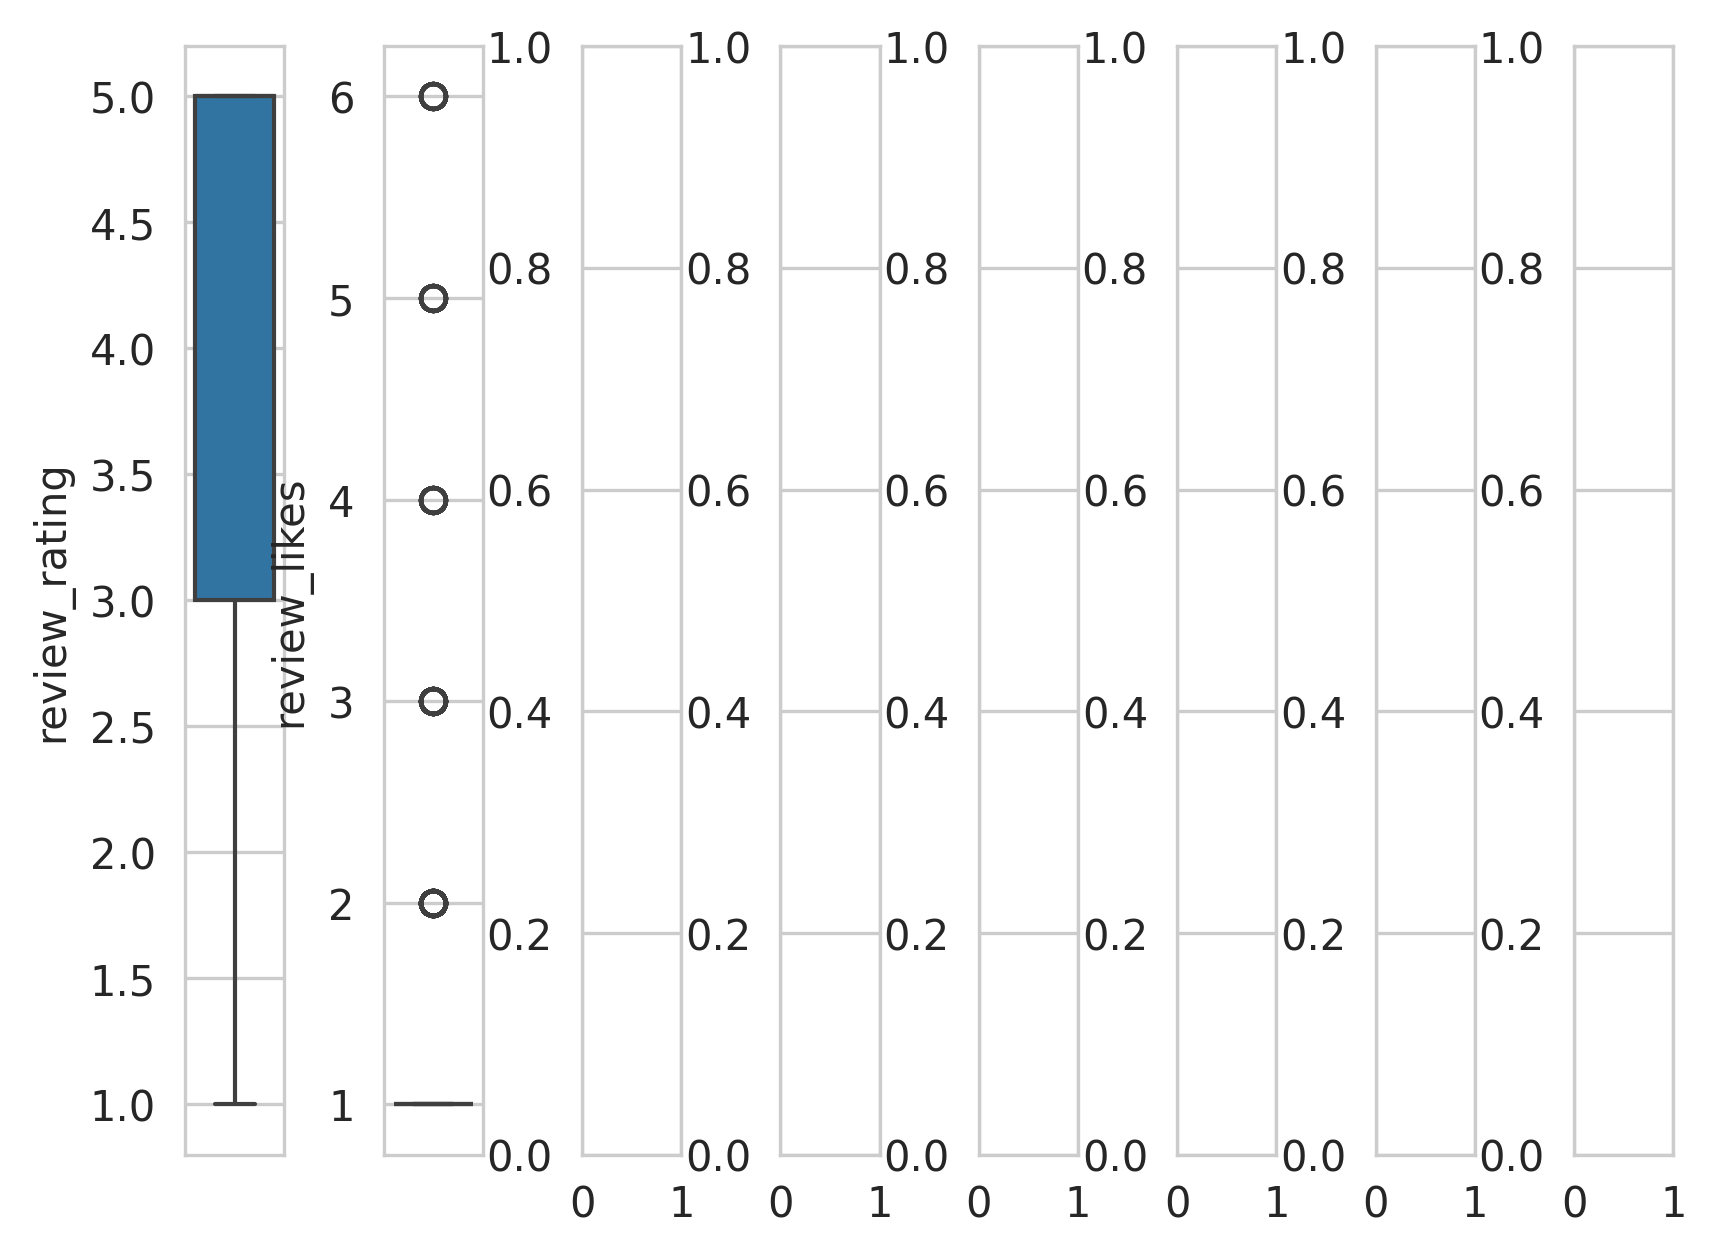

In [ ]:
#import library untuk kebutuhan modelling
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 8 bar
f, axes = plt.subplots(1, 8)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 2
sns.boxplot(y=df["review_rating"], ax=axes[0])
sns.boxplot(y=df["review_likes"], ax=axes[1])
#menampilkan plot
plt.subplots_adjust(wspace=1)

In [ ]:
index=df[df['review_rating']>=7].index
df.drop(index , inplace=True)
index=df[df['review_likes']>=500].index
df.drop(index , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14410 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          14410 non-null  int64 
 1   review_text         14410 non-null  object
 2   review_rating       14410 non-null  int64 
 3   review_likes        14410 non-null  int64 
 4   author_app_version  14410 non-null  object
 5   review_timestamp    14410 non-null  object
dtypes: int64(3), object(3)
memory usage: 788.0+ KB


**SPLIT DATA**

In [ ]:
#melakukan split pada tabel paling belakang saja
X = df.iloc[:, :-3].values
#melakukan split pada tabel 1-5 belakang saja
Y = df.iloc[:, 4].values
#membagi X dan Y menjadi 2 bagian yaitu data test dan data train
#Perbandingan split yang digunakan adalah 2:3 (0.4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# **Klasifikasi mengunakan Metode Naive Bayes**

In [ ]:
# Hanya pilih kolom numerik untuk fitur
X = df.select_dtypes(include=['int64', 'float64'])

# Targetnya pakai kolom rating (misalnya ingin klasifikasi rating)
Y = df['review_rating']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Jalankan Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)


In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')
#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')
#melakukan print confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
#melakukan print Classification report
print("Classification report")
print(classification_report(Y_test,Y_pred))

[5 5 5 ... 5 5 5]


Accuracy: 0.5845477677538746


[[   0    0    0    0  838]
 [   0    0    0    0  183]
 [   0    0    0    0  299]
 [   0    0    0    0  476]
 [   0    0    0    0 2527]]


Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       838
           2       0.00      0.00      0.00       183
           3       0.00      0.00      0.00       299
           4       0.00      0.00      0.00       476
           5       0.58      1.00      0.74      2527

    accuracy                           0.58      4323
   macro avg       0.12      0.20      0.15      4323
weighted avg       0.34      0.58      0.43      4323



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#menampilkan DataFrame yang membandingkan antara data actual dan data prediksi
x = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
x

,Actual,Predicted
8280,1,5
10991,3,5
10561,5,5
5306,5,5
12497,2,5
...,...,...
10603,5,5
13372,1,5
16709,5,5
16021,5,5


In [ ]:
#merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 1.150821188989128


# **Klasifikasi 2**

---

Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap data sampel. Pada tugas besar ini, saya melakukan perbandingan 2 teknik klasifikasi untuk mengklasifikasi reviews para penonton netflix.

Pada klasifikasi 1 dan klasifikasi 2, saya menggunakan metode Naive Bayes. Perbedaannya terdapat pada tahapan Prepocessing Datanya.

---

Untuk klasifikasi 2, saya melakukan tidak drop terhadap seluruh data yang terdapat missing valuenya. Namun missing value pada kolom reviews_per_month, dilakukan pengisian missing value dengan mencari nilai mean. Selanjutnya, dilakukan penghapusan beberapa outlier yang ada pada dataset setelah diberikan treatment handle outlier menggunakan nilai rata-rata (mean), namun tidak memberikan range pada setiap atribut. Sehingga, tetap menggunakan nilai asli dari kolom tersebut. Selanjutnya, nilai-nilai tersebut akan digunakan untuk perhitungan klasifikasi menggunakan metode Naive Bayes.

In [ ]:
#import library yang menunjang proses mining data
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing.
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
import collections
#library untuk melakukan bilangan random integer
from random import randint
import random

#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import library untuk split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Skrip python untuk pembuatan matriks
#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix
#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score
#library untuk menampilkan classification_report
from sklearn.metrics import classification_report
#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

#Import scikit-learn metrics module for accuracy calculation
#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics
from sklearn import preprocessing

#import library untuk membuat permodelan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#membaca data csv yang sudah diupload dengan nama dataset_Gabungan
import io
df = pd.read_csv(io.BytesIO(dataupload['dataset_gabungan.csv']))
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48


# **CLEANING DATA**

In [ ]:
# Identifikasi missing value
df.isnull().head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
#mengitung jumlah data missing
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,74
review_rating,0
review_likes,0
author_app_version,5520
review_timestamp,0


In [ ]:
# Mengisi missing value pada kolom review_text dengan teks default
df['review_text'] = df['review_text'].fillna('No review')

# Menghapus baris lain yang masih memiliki missing value
df.dropna(inplace=True)

# Menampilkan informasi setelah cleaning
df.info()

# Menampilkan jumlah missing value di setiap kolom
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 14480 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          14480 non-null  int64 
 1   review_id           14480 non-null  object
 2   pseudo_author_id    14480 non-null  object
 3   author_name         14480 non-null  object
 4   review_text         14480 non-null  object
 5   review_rating       14480 non-null  int64 
 6   review_likes        14480 non-null  int64 
 7   author_app_version  14480 non-null  object
 8   review_timestamp    14480 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB
Unnamed: 0            0
review_id             0
pseudo_author_id      0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
dtype: int64


In [ ]:
#menampilkan data terbaru setela menghandle missing value
df

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48
6,577045,b7070f27-510f-4fbe-9622-804eb39a326a,335106364419677575018,A Google user,I know v .ddrfed😄😍🤗😋🤔😋😃,5,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...,...,...,...
19994,462248,710172b0-4420-4d0b-8955-df68dd544aae,174137966231132927604,A Google user,Watch what ever you want and AWESOME. But need...,5,0,4.12.2 build 14444,2017-05-02 23:19:19
19996,1275534,9512e7c2-43df-4b0b-ac0b-3fd645d6d83e,114997473460505752333,K***A,"6 ,",3,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,84356794-257f-4eb3-8b8e-ad944035d5fb,669925661829914006340,Ge**********ll,BRING BACK INSIDE JOB,1,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,b832c321-b054-479a-9f03-7f93102a550e,168241075820624664861,A Google user,Good,5,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#menghapus tabel yg tidak digunakan
del df['review_id']
del df['pseudo_author_id']
del df['author_name']
#mengeluarkan output df tanpa kolom yang sudah didrop
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
4,258546,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48
6,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...
19994,462248,Watch what ever you want and AWESOME. But need...,5,0,4.12.2 build 14444,2017-05-02 23:19:19
19996,1275534,"6 ,",3,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,BRING BACK INSIDE JOB,1,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,Good,5,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#mengubah room type menjadi integer
#rekap data review_text
data1 = df['review_text']

# proses rekap
rekapData1 = {}
for row in data1:
    if row in rekapData1:
        rekapData1[row] += 1
    else:
        rekapData1[row] = 1

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData1 = sorted(rekapData1.items(), key=itemgetter(1), reverse=True)

#print(sortedRekapData3)
print(' ')
print('Banyaknya data pada Tabel review_text = ', len(sortedRekapData1))

df['review_text'] = df['review_text'].replace({'I. Like. To. Play. Game': 1, 'Netflix is discussing. Boycott': 2, 'BRING BACK INSIDE JOB': 3})

 
Banyaknya data pada Tabel review_text =  5889


In [ ]:
#rekap data review_rating
data2 = df['review_rating']

# proses rekap
rekapData2 = {}
for row in data2:
    if row in rekapData2:
        rekapData2[row] += 1
    else:
        rekapData2[row] = 1
#print(rekapData2)

#mengurutkan dari besar ke kecil
from operator import itemgetter

# sorting descending
sortedRekapData2 = sorted(rekapData2.items(), key=itemgetter(1), reverse=True)

print(sortedRekapData2)
print(' ')
print('Banyaknya data pada Tabel review_rating = ', len(sortedRekapData2))

df['review_rating'] =  df['review_rating'].replace({'1': 1, '3': 2, '4': 3, '5': 4})

[(5, 8508), (1, 2776), (4, 1566), (3, 972), (2, 658)]
 
Banyaknya data pada Tabel review_rating =  5


# **Identifikasi Outlier**

<Figure size 15000x30000 with 0 Axes>

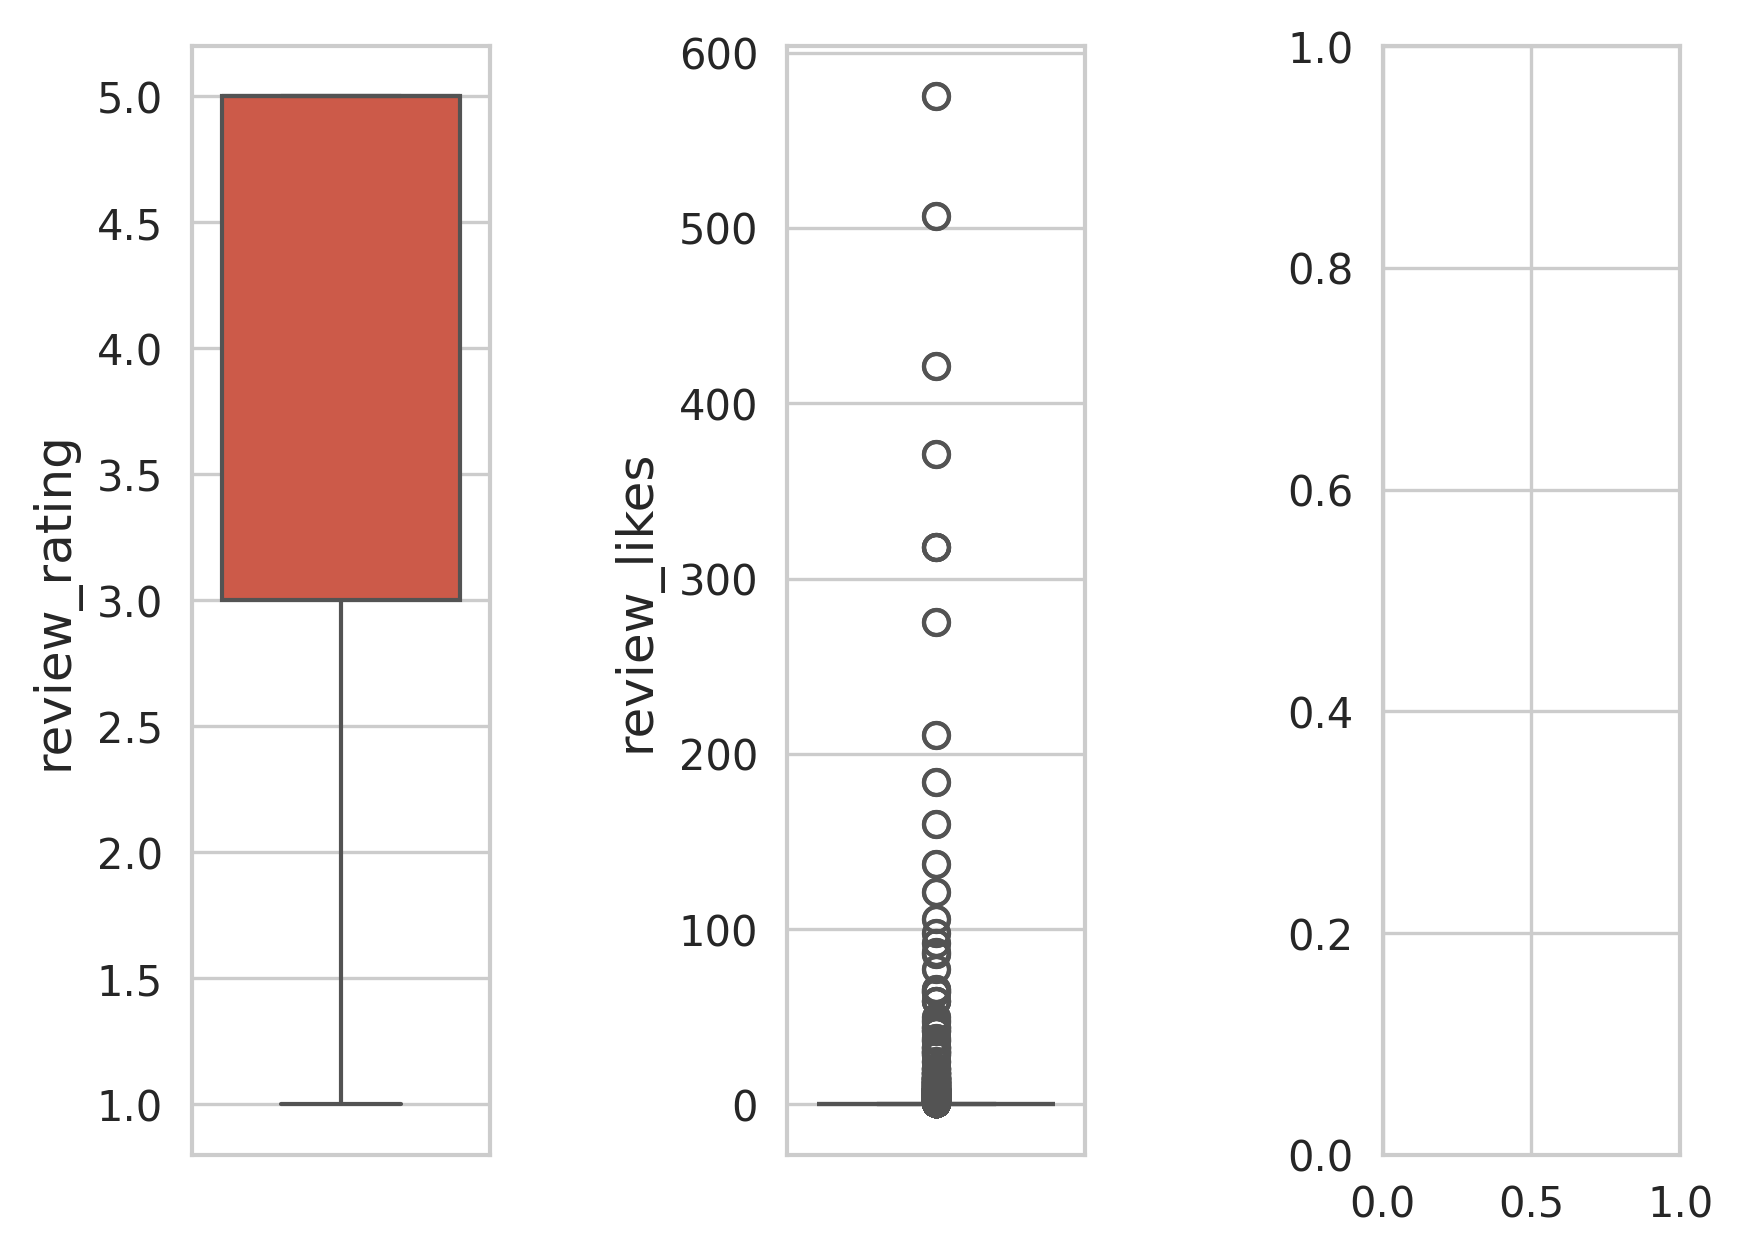

In [ ]:
#import library untuk kebutuhan modelling
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 3 bar
f, axes = plt.subplots(1, 3)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 2
sns.boxplot(y=df["review_rating"], ax=axes[0])
sns.boxplot(y=df["review_likes"], ax=axes[1])
#sns.boxplot(y=df["Status"], ax=axes[2])
#menampilkan plot
plt.subplots_adjust(wspace=1)

In [ ]:
# --- Identifikasi & Penanganan Outlier review_rating ---

import pandas as pd

# Cek ringkasan awal kolom rating
print("Ringkasan Awal review_rating:")
print(df['review_rating'].describe())
print("-" * 50)

# 1️⃣ Deteksi outlier (nilai di luar 1–5)
outliers = df[(df['review_rating'] < 1) | (df['review_rating'] > 5)]

print("Jumlah data outlier:", len(outliers))
if len(outliers) > 0:
    print(outliers[['review_text', 'review_rating']].head())
else:
    print("Tidak ada data outlier pada kolom review_rating.")

# 2️⃣ Hitung rata-rata rating normal
mean_rating = df.loc[(df['review_rating'] >= 1) & (df['review_rating'] <= 5), 'review_rating'].mean()
print("\nRata-rata rating normal:", mean_rating)

# 3️⃣ Ganti nilai outlier dengan rata-rata
df.loc[(df['review_rating'] < 1) | (df['review_rating'] > 5), 'review_rating'] = mean_rating

# 4️⃣ Konfirmasi hasil akhir
print("\nSetelah perbaikan:")
print(df['review_rating'].describe())
print("-" * 50)
print("Jumlah outlier setelah dibersihkan:",
      len(df[(df['review_rating'] < 1) | (df['review_rating'] > 5)]))


Ringkasan Awal review_rating:
count    14480.000000
mean         3.854420
std          1.594008
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64
--------------------------------------------------
Jumlah data outlier: 0
Tidak ada data outlier pada kolom review_rating.

Rata-rata rating normal: 3.8544198895027626

Setelah perbaikan:
count    14480.000000
mean         3.854420
std          1.594008
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64
--------------------------------------------------
Jumlah outlier setelah dibersihkan: 0


/tmp/ipython-input-1510806726.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.8544198895027626' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['review_rating'] < 1) | (df['review_rating'] > 5), 'review_rating'] = mean_rating


Ringkasan Awal review_likes:
count    14480.000000
mean         1.083425
std         14.058188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        575.000000
Name: review_likes, dtype: float64
--------------------------------------------------
IQR: 0.0
Batas bawah: 0.0
Batas atas: 0.0

Jumlah data outlier: 1922
                                          review_text  review_likes
2                                                   2             2
13  I wish we could block notifications when we ar...             2
34  Guys! My Galaxy Tab 10.1 plays this fine on 4G...             1
46                                               good             1
52  good experience need some improvisation please...             1

Median review_likes normal: 0.0

Setelah perbaikan:
count    14480.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: review_likes, dtype: float64
--------

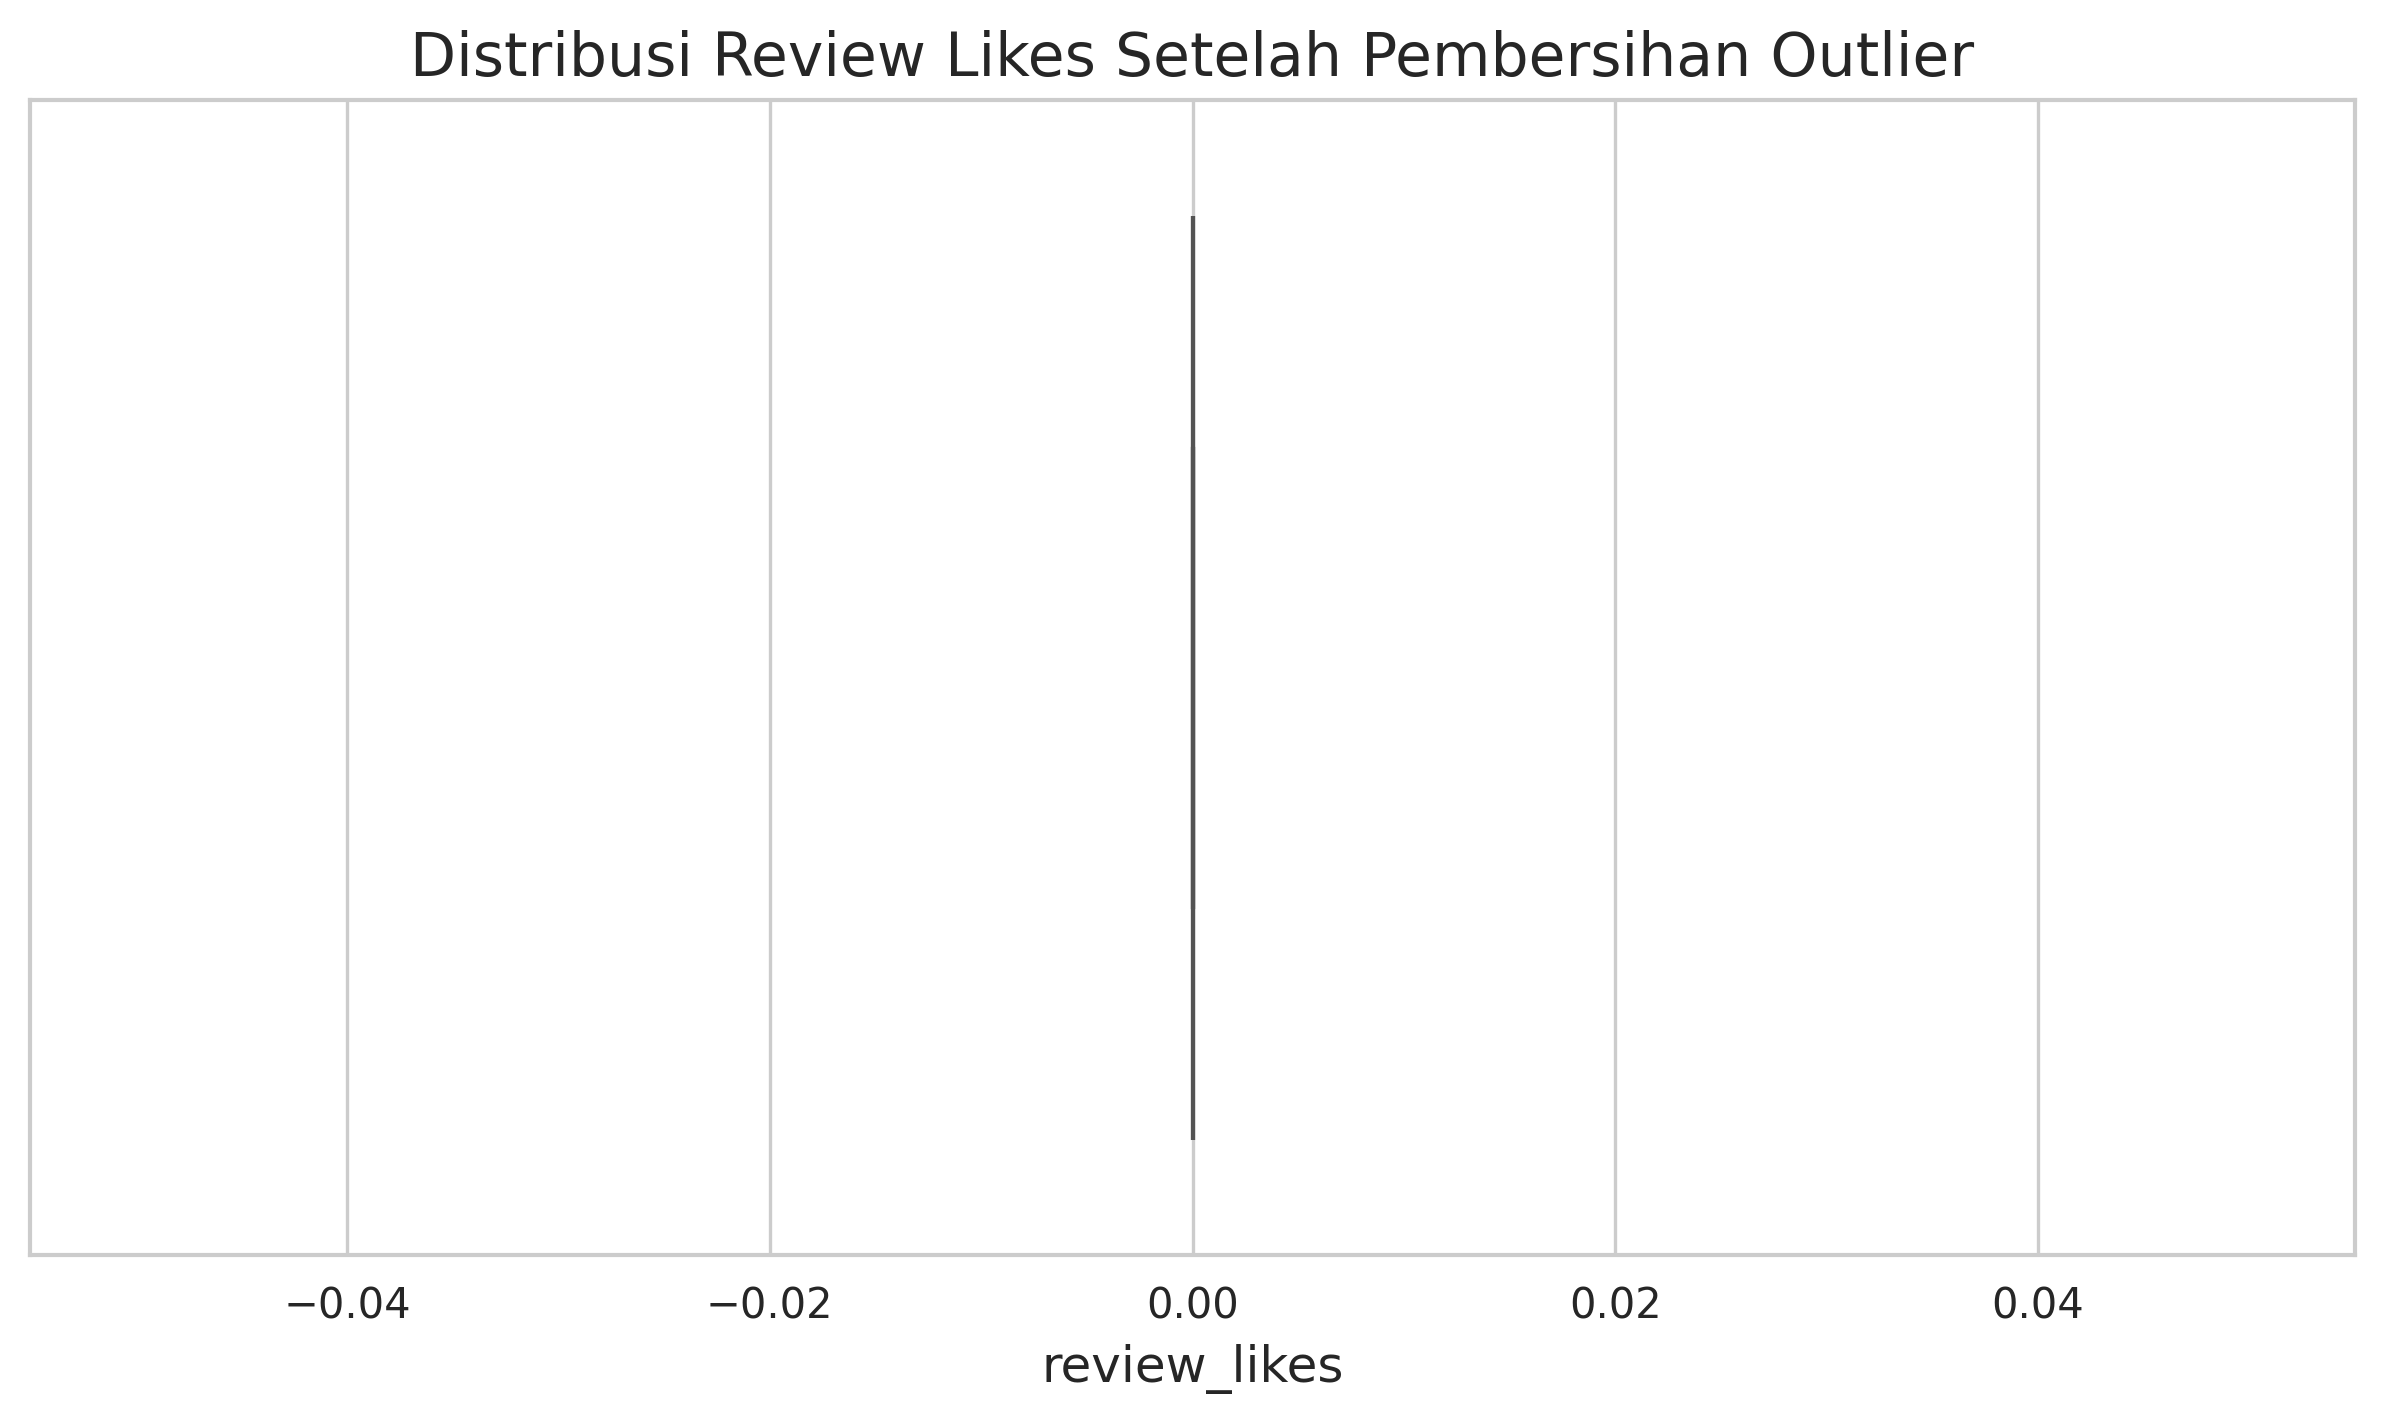

In [ ]:
# --- Identifikasi & Penanganan Outlier review_likes ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cek ringkasan awal kolom review_likes
print("Ringkasan Awal review_likes:")
print(df['review_likes'].describe())
print("-" * 50)

#Deteksi outlier menggunakan IQR (Interquartile Range)
Q1 = df['review_likes'].quantile(0.25)
Q3 = df['review_likes'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk data normal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

# Ambil data yang termasuk outlier
outliers = df[(df['review_likes'] < lower_bound) | (df['review_likes'] > upper_bound)]

print("\nJumlah data outlier:", len(outliers))
if len(outliers) > 0:
    print(outliers[['review_text', 'review_likes']].head())
else:
    print("Tidak ada data outlier pada kolom review_likes.")

# Hitung median dari data normal (lebih stabil untuk data miring)
median_likes = df[(df['review_likes'] >= lower_bound) & (df['review_likes'] <= upper_bound)]['review_likes'].median()
print("\nMedian review_likes normal:", median_likes)

#Ganti nilai outlier dengan median
df.loc[(df['review_likes'] < lower_bound) | (df['review_likes'] > upper_bound), 'review_likes'] = median_likes

#Konfirmasi hasil akhir
print("\nSetelah perbaikan:")
print(df['review_likes'].describe())
print("-" * 50)
print("Jumlah outlier setelah dibersihkan:",
      len(df[(df['review_likes'] < lower_bound) | (df['review_likes'] > upper_bound)]))

#Visualisasi distribusi sebelum & sesudah
plt.figure(figsize=(10,5))
sns.boxplot(x=df['review_likes'])
plt.title("Distribusi Review Likes Setelah Pembersihan Outlier")
plt.show()


In [ ]:
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1.0,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5.0,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,2,1.0,0,7.73.1 build 15 35102,2020-09-17 19:06:41
4,258546,"I would love to give Netflix a 5 star, but I c...",4.0,0,3.11.1 build 4421,2015-04-13 00:40:48
6,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5.0,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...
19994,462248,Watch what ever you want and AWESOME. But need...,5.0,0,4.12.2 build 14444,2017-05-02 23:19:19
19996,1275534,"6 ,",3.0,0,7.103.0 build 9 35464,2021-10-27 17:16:10
19997,1443943,3,1.0,0,8.52.2 build 14 50335,2023-01-10 07:39:25
19998,845752,Good,5.0,0,7.27.0 build 11 34489,2019-12-19 06:35:09


<Figure size 15000x30000 with 0 Axes>

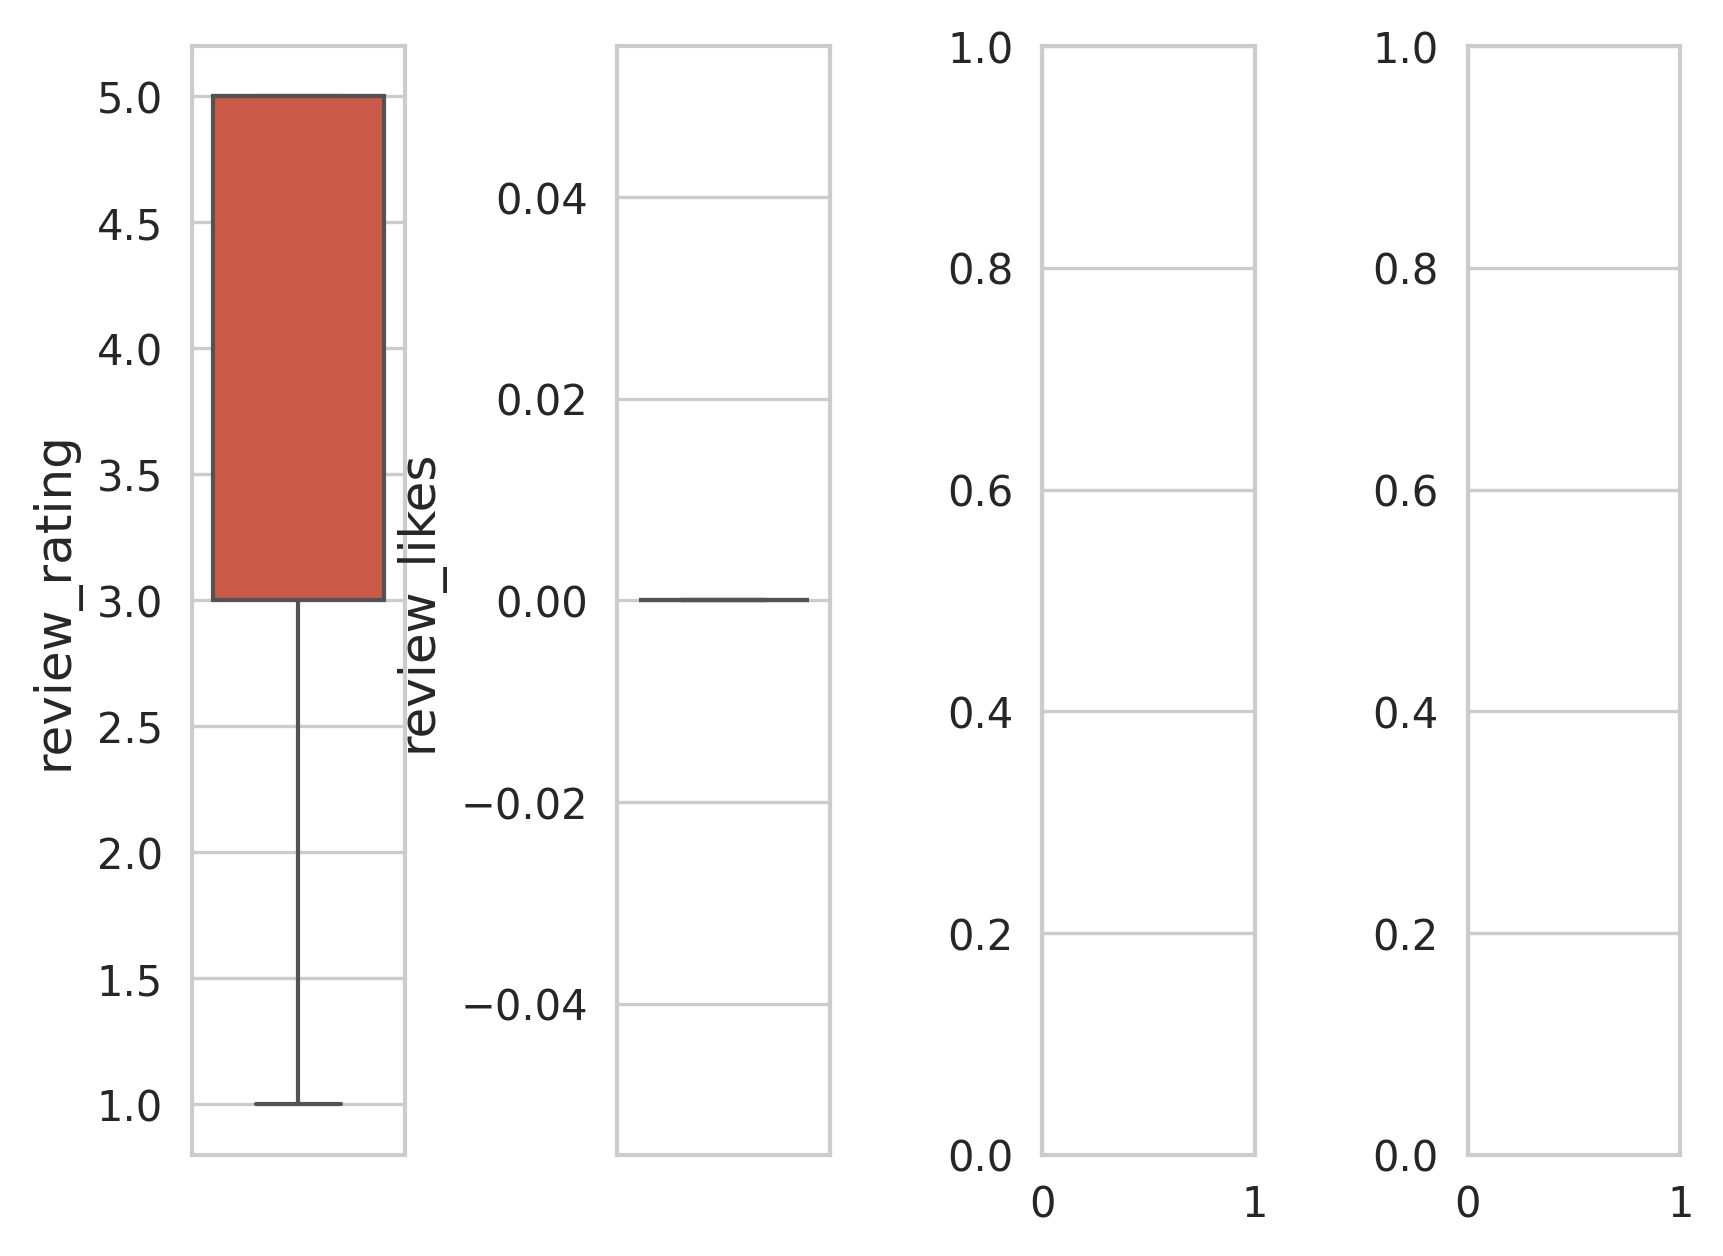

In [ ]:
#import library untuk kebutuhan modelling
import seaborn as sns
#mendefinisikan style dengan Whitegrids
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib as mpl untuk modelling outlier
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#menentukan ukuran figure yaitu 50:100
plt.figure(figsize=(50, 100))
#membuat subplots sebanyak 4 bar
f, axes = plt.subplots(1, 4)
#memberikan nama label untuk setiap bar yang dimulai dari axes = 0 sampai axes = 2
sns.boxplot(y=df["review_rating"], ax=axes[0])
sns.boxplot(y=df["review_likes"], ax=axes[1])
#menampilkan plot
plt.subplots_adjust(wspace=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (Y)
X = df.drop('review_rating', axis=1).values
Y = df['review_rating'].values

# Membagi data menjadi data train dan test
# 70% data train, 30% data test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (10136, 5)
Ukuran data testing: (4344, 5)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Pastikan kolom teks ada di df['review_text']
# dan kolom target di df['review_rating']

#Pisahkan fitur dan target
X = df['review_text']
Y = df['review_rating']

#Ubah teks menjadi representasi numerik (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
# Pastikan semua nilai diubah menjadi string
X = df['review_text'].astype(str)

# Ubah teks menjadi representasi numerik (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

#Split data train-test
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.3, random_state=42)

#Jalankan Naive Bayes
gnb = GaussianNB()

# Karena GaussianNB butuh array biasa (bukan sparse matrix), ubah ke dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

gnb.fit(X_train_dense, Y_train)
Y_pred = gnb.predict(X_test_dense)

#Evaluasi hasil
print("Akurasi:", accuracy_score(Y_test, Y_pred))
print("\nLaporan klasifikasi:\n", classification_report(Y_test, Y_pred))


Akurasi: 0.35267034990791896

Laporan klasifikasi:
               precision    recall  f1-score   support

         1.0       0.79      0.52      0.63       866
         2.0       0.09      0.81      0.16       207
         3.0       0.24      0.58      0.34       293
         4.0       0.37      0.43      0.40       459
         5.0       0.89      0.22      0.35      2519

    accuracy                           0.35      4344
   macro avg       0.48      0.51      0.38      4344
weighted avg       0.73      0.35      0.40      4344



In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')
#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')
#melakukan print confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
#melakukan print Classification report
print("Classification report")
print(classification_report(Y_test,Y_pred))

[1. 3. 2. ... 1. 2. 4.]


Accuracy: 0.35267034990791896


[[ 453  248   90   39   36]
 [  14  167   10   12    4]
 [  20   81  170   16    6]
 [  16  170   50  199   24]
 [  70 1261  379  266  543]]


Classification report
              precision    recall  f1-score   support

         1.0       0.79      0.52      0.63       866
         2.0       0.09      0.81      0.16       207
         3.0       0.24      0.58      0.34       293
         4.0       0.37      0.43      0.40       459
         5.0       0.89      0.22      0.35      2519

    accuracy                           0.35      4344
   macro avg       0.48      0.51      0.38      4344
weighted avg       0.73      0.35      0.40      4344



In [ ]:
#menampilkan DataFrame yang membandingkan antara data actual dan data prediksi
x = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
x

,Actual,Predicted
16027,1.0,1.0
13690,5.0,3.0
2514,4.0,2.0
17701,5.0,5.0
8379,5.0,5.0
...,...,...
16745,4.0,2.0
18589,1.0,2.0
19384,4.0,1.0
770,5.0,2.0


In [ ]:
#merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 1.4841160220994476


In [ ]:
# Simpan dataset hasil cleaning ke file CSV
df.to_csv('cleaned_dataset.csv', index=False)

print("Dataset hasil cleaning berhasil disimpan sebagai 'cleaned_dataset.csv'")

Dataset hasil cleaning berhasil disimpan sebagai 'cleaned_dataset.csv'


# **KESIMPULAN**

# **Kesimpulan Proyek - Klasifikasi Netflix Reviews**


Proyek ini membahas analisis dan klasifikasi ulasan pengguna (reviews) pada platform Netflix menggunakan algoritma Naive Bayes. Tujuan utamanya adalah untuk mengelompokkan sentimen review (misalnya positif, negatif, atau netral) berdasarkan teks ulasan yang tersedia.

Dalam proyek ini dilakukan dua percobaan klasifikasi (Klasifikasi 1 dan 2) yang menggunakan algoritma sama, tetapi berbeda pada tahapan preprocessing data.

---

# **Klasifikasi 1**



*   Data yang memiliki missing value dihapus seluruhnya.
*   Outlier dibiarkan tetap ada.
*   Atribut yang memiliki lebih dari 15 variasi nilai dibagi ke dalam beberapa range agar distribusi data lebih seragam.
*   Atribut yang memiliki lebih dari 15 variasi nilai dibagi ke dalam beberapa range agar distribusi data lebih seragam.

Pendekatan ini menekankan kesederhanaan dan konsistensi data numerik, meskipun sebagian informasi mungkin hilang akibat penghapusan data kosong.


---

# **Klasifikasi 2**

*   Menggunakan teknik preprocessing yang berbeda (misalnya: pengisian missing value dengan metode tertentu, atau normalisasi data).
*   Tujuannya adalah untuk melihat bagaimana penanganan data yang lebih halus dapat memengaruhi hasil klasifikasi.



---

# **Hasil dari Analisis**

Dari perbandingan kedua pendekatan:


*   Tahapan preprocessing data memiliki pengaruh besar terhadap akurasi model.
*   Model Naive Bayes dapat bekerja dengan baik pada data teks seperti Netflix reviews, terutama jika data sudah bersih dan terdistribusi dengan baik.
*   Penghapusan missing value secara total cenderung menyederhanakan data namun bisa mengurangi informasi, sementara teknik imputasi atau normalisasi membantu menjaga keseimbangan antara kelengkapan dan kualitas data.


---

# **KESIMPULAN AKHIR**

Algoritma Naive Bayes terbukti efektif digunakan untuk klasifikasi sentimen ulasan Netflix, asalkan proses preprocessing dilakukan dengan cermat.

Kualitas hasil klasifikasi sangat bergantung pada:


1.   Penanganan missing value dan outlier.
2.   Transformasi fitur (seperti pembentukan range atau tokenisasi teks).
3.   Konsistensi antara data latih dan data uji.

Dengan optimasi tahapan preprocessing, akurasi model dapat meningkat dan memberikan hasil klasifikasi yang lebih reliabel untuk analisis sentimen pengguna Netflix.


**PROCESSING**



Processing (pra-pemroresan data) adalah tahap awal dalam analisis data atau NLP (Natural Language Processing) untuk membersihkan dan menyiapkan data mentah agar siap digunakan dalam proses analisis atau pemodelan.



In [ ]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving dataset_gabungan.csv to dataset_gabungan.csv


Preprocessing

Import Packages and Data

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import googletrans

import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_train = pd.read_csv("dataset_gabungan.csv", sep=",")
data_train.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48


In [ ]:
data_test = pd.read_csv("dataset_gabungan.csv", sep=",")
data_test.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48


In [ ]:
data_val = pd.read_csv("dataset_gabungan.csv", sep=",")
data_val.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48


Preprocessing

Text Cleaning and Preparation

1. Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
def cleaning(data):
    # pastikan kolom review_text bertipe string
    data['review_text'] = data['review_text'].astype(str)

    # replace common escape characters
    data['review_text'] = data['review_text'].str.replace(r"\r", " ")
    data['review_text'] = data['review_text'].str.replace(r"\n", " ")
    data['review_text'] = data['review_text'].str.replace("&amp", " ")
    data['review_text'] = data['review_text'].str.replace("&gt", " ")
    data['review_text'] = data['review_text'].str.replace("&lt", " ")
    data['review_text'] = data['review_text'].str.replace('"', '')

    # remove urls
    url_pattern = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'"".,<>?«»“”‘’]))'
    data['review_text'] = data['review_text'].str.replace(url_pattern, " ", regex=True)

    # remove hex codes
    data['review_text'] = data['review_text'].str.replace(r"\\x[a-zA-Z0-9]{2}", "", regex=True)

    return data


In [ ]:
data_train = cleaning(data_train)

2. Mengubah menjadi lower case

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_gabungan.csv')


In [ ]:
df['review_text'] = df['review_text'].str.lower()

In [ ]:
# misal kolom aslimu adalah 'review_text'
def lowerCase(data):
    # buat dua kolom baru dari kolom aslinya
    data['Tweet_Parsed_1'] = data['review_text'].astype(str)
    data['Tweet_Parsed_2'] = data['review_text'].astype(str)

    # ubah jadi huruf kecil
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.lower()
    data['Tweet_Parsed_2'] = data['Tweet_Parsed_2'].str.lower()
    return data

In [ ]:
data_train = lowerCase(data_train)

3. Hapus simbol dan tanda baca

In [ ]:
def clean_text(text):
    text = str(text)
    # replace common escape characters
    text = text.replace("\r", " ").replace("\n", " ")
    text = text.replace("&amp", " ").replace("&gt", " ").replace("&lt", " ")
    text = text.replace('"', '')

    # remove URLs
    import re
    url_pattern = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'"".,<>?«»“”‘’]))'
    text = re.sub(url_pattern, " ", text)

    # remove hex codes
    text = re.sub(r"\\x[a-zA-Z0-9]{2}", "", text)

    # lowercase
    text = text.lower()

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
df['review_text'] = df['review_text'].fillna('').astype(str)
df['review_text'] = df['review_text'].apply(clean_text)

4. 1. Normalisasi Kata

In [ ]:
import pandas as pd
import re
import string


In [ ]:
df = pd.read_csv('/content/dataset_gabungan.csv')
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,71da1ebe-c4de-42af-a57b-160753a49f8e,951689925352388599857,A Google user,"App doesn't launch, whenever I click on it it ...",1,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,f9165a69-5379-41f5-8f78-2288da4b8ffa,854902377915095106020,A Google user,I. Like. To. Play. Game,5,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,4e274649-a4b5-4f9a-bf8e-f2b36f0fb9c8,210878545925205654018,Sa***************me,Netflix is discussing. Boycott,1,2,7.73.1 build 15 35102,2020-09-17 19:06:41
3,325178,2b7b511e-c7dd-4171-bae6-bfe8333dd463,646857312561636926910,A Google user,Amazing,5,0,NaN,2016-03-17 22:45:10
4,258546,4b32c722-f4ac-4c02-9aaf-a53bd2c3a9f2,105048390186850789784,A Google user,"I would love to give Netflix a 5 star, but I c...",4,0,3.11.1 build 4421,2015-04-13 00:40:48


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize

# Bersihkan teks dasar (hapus angka, tanda baca, URL, dsb)
def basic_clean(text):
    if not isinstance(text, str):
        text = ''
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # hapus URL
    text = re.sub(r'\d+', '', text)                      # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    return text.lower().strip()

# Misal kolom aslimu adalah 'review_text'
data_train['clean_text'] = data_train['review_text'].apply(basic_clean)


In [ ]:
def clean_space_data(df, text_col):
    """
    Membersihkan spasi ganda dan karakter tidak penting dari kolom teks.
    """
    df[text_col] = df[text_col].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip())
    return df


In [ ]:
data_train['clean_text'] = data_train['review_text'].apply(basic_clean)
data_train = clean_space_data(data_train, text_col='clean_text')

In [ ]:
data_train[['review_text', 'clean_text']].head()


,review_text,clean_text
0,"App doesn't launch, whenever I click on it it ...",app doesnt launch whenever i click on it it ju...
1,I. Like. To. Play. Game,i like to play game
2,Netflix is discussing. Boycott,netflix is discussing boycott
3,Amazing,amazing
4,"I would love to give Netflix a 5 star, but I c...",i would love to give netflix a star but i can ...


4. 2. Menghilangkan Angka

In [ ]:
def removeNumb(data):
    data['review_text'] = data['review_text'].astype(str).str.replace('[^a-zA-Z]+', ' ', regex=True)
    return data

In [ ]:
import re

def remove_numbers(text):
    if not isinstance(text, str):
        text = ''
    return re.sub(r'\d+', '', text)  # hapus semua angka

df['clean_text'] = df['review_text'].astype(str).apply(remove_numbers)


In [ ]:
df['review_text'] = df['review_text'].astype(str).apply(remove_numbers)


In [ ]:
df[['review_text', 'clean_text']].head()


,review_text,clean_text
0,"App doesn't launch, whenever I click on it it ...","App doesn't launch, whenever I click on it it ..."
1,I. Like. To. Play. Game,I. Like. To. Play. Game
2,Netflix is discussing. Boycott,Netflix is discussing. Boycott
3,Amazing,Amazing
4,"I would love to give Netflix a star, but I ca...","I would love to give Netflix a star, but I ca..."


4. 3. Menghilangkan kata tidak bermakna

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# pastikan stopwords & tokenizer sudah terunduh
nltk.download('punkt')
nltk.download('stopwords')

# siapkan daftar stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# fungsi untuk menghapus kata tidak bermakna
def remove_stopwords(text):
    if not isinstance(text, str):
        text = ''
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# penerapan pada kolom 'clean_text'
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# ✅ tampilkan hasil untuk melihat perbedaannya
df[['review_text', 'clean_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_text,clean_text
0,"App doesn't launch, whenever I click on it it ...","App n't launch , whenever click show Netflix l..."
1,I. Like. To. Play. Game,. Like . . Play . Game
2,Netflix is discussing. Boycott,Netflix discussing . Boycott
3,Amazing,Amazing
4,"I would love to give Netflix a star, but I ca...","would love give Netflix star , watch new seaso..."


4. Menghilangkan imbuhan (stemming)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmerID = factory.create_stemmer()

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatization (bukan stemming Indonesia)
def stemming(text, stemmer_en):
    text_split = word_tokenize(text)
    stemmed_list = []
    for i in text_split:
        stem_text1 = stemmer_en.lemmatize(i, pos="v")
        stem_text2 = stemmer_en.lemmatize(stem_text1, pos="n")
        stem_text3 = stemmer_en.lemmatize(stem_text2, pos="a")
        stemmed_list.append(stem_text3)
    stemmed = ' '.join(stemmed_list)
    return stemmed

# Fungsi untuk proses pada DataFrame
def stemData(data, stemmer_en, text_col='clean_text'):
    # Buat kolom baru hasil stemming/lemmatization
    data['stemmed_text'] = data[text_col].apply(lambda x: stemming(x, stemmer_en))
    return data


In [ ]:
# Terapkan fungsi pada DataFrame
df = stemData(df, lemmatizer, text_col='clean_text')

# Tampilkan hasil agar output-nya terlihat
df[['clean_text', 'stemmed_text']].head()


,clean_text,stemmed_text
0,"App n't launch , whenever click show Netflix l...","App n't launch , whenever click show Netflix l..."
1,. Like . . Play . Game,. Like . . Play . Game
2,Netflix discussing . Boycott,Netflix discus . Boycott
3,Amazing,Amazing
4,"would love give Netflix star , watch new seaso...","would love give Netflix star , watch new seaso..."


5. Remove Stopword

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = list(stopwords.words('indonesian')) + list(stopwords.words('english'))
stop_words = stop_words+["rt","retweet","url"]

In [ ]:
print(list(stop_words)[:20])


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


In [ ]:
print("Jumlah stopwords:", len(stop_words))

Jumlah stopwords: 959


In [ ]:
df['clean_text'] = df['clean_text'].apply(
    lambda x: ' '.join([w for w in word_tokenize(x) if w.lower() not in stop_words])
)

In [ ]:
df[['review_text', 'clean_text']].head()


,review_text,clean_text
0,"App doesn't launch, whenever I click on it it ...","App n't launch , whenever click show Netflix l..."
1,I. Like. To. Play. Game,. Like . . Play . Game
2,Netflix is discussing. Boycott,Netflix discussing . Boycott
3,Amazing,Amazing
4,"I would love to give Netflix a star, but I ca...","would love give Netflix star , watch new seaso..."


6. Clean Space

In [ ]:
# Fungsi untuk membersihkan spasi berlebih dalam satu kalimat
def clean_space(text):
    text_split = text.split(' ')
    text_clean = [i for i in text_split if i != '']  # buang spasi kosong
    text_fix = ' '.join(text_clean)                 # gabungkan ulang
    return text_fix

# Fungsi untuk membersihkan seluruh kolom teks
def clean_space_data(data, text_col='stemmed_text'):
    # Buat kolom baru untuk hasil clean space
    data['clean_final'] = data[text_col].apply(lambda x: clean_space(x))
    return data

In [ ]:
data_train = clean_space_data(data_train, text_col='clean_text')

In [ ]:
data_train[['clean_text', 'clean_final']].head()

,clean_text,clean_final
0,app doesnt launch whenever i click on it it ju...,app doesnt launch whenever i click on it it ju...
1,i like to play game,i like to play game
2,netflix is discussing boycott,netflix is discussing boycott
3,amazing,amazing
4,i would love to give netflix a star but i can ...,i would love to give netflix a star but i can ...


Fixing Data

In [ ]:
def fixData(data, use_stemming=True, use_stopword=True):

    if use_stemming and 'Tweet_Parsed_2' in data.columns:
        data_fix = data[['Tweet_Parsed_2']].copy()
        data_fix = data_fix.rename(columns={'Tweet_Parsed_2': 'Tweet_Parsed'})

    elif use_stopword and 'Tweet_Parsed_1' in data.columns:
        data_fix = data[['Tweet_Parsed_1']].copy()
        data_fix = data_fix.rename(columns={'Tweet_Parsed_1': 'Tweet_Parsed'})

    elif 'clean_text' in data.columns:
        data_fix = data[['clean_text']].copy()
        data_fix = data_fix.rename(columns={'clean_text': 'Tweet_Parsed'})

    else:
        raise KeyError("Tidak ada kolom teks yang tersedia di dataset!")

    return data_fix


In [ ]:
data_train_full = fixData(data_train, use_stemming=True, use_stopword=True)

In [ ]:
data_train_nostopword = fixData(data_train, use_stemming=True, use_stopword=False)

In [ ]:
data_train_nostemstop = fixData(data_train, use_stemming=False, use_stopword=False)

In [ ]:
print(data_train_full.head())

                                        Tweet_Parsed
0  app doesn't launch, whenever i click on it it ...
1                          i. like.  to. play.  game
2                     netflix is discussing. boycott
3                                            amazing
4  i would love to give netflix a 5 star, but i c...


Empty String

In [ ]:
def handleEmptyString(data):
    data['Tweet_Parsed'] = data['Tweet_Parsed'].fillna('')
    data.loc[data['Tweet_Parsed'].str.strip() == '', 'Tweet_Parsed'] = ' '
    return data

In [ ]:
data_train_full = handleEmptyString(data_train_full)

In [ ]:
data_train_nostopword = handleEmptyString(data_train_nostopword)

In [ ]:
data_train_nostemstop = handleEmptyString(data_train_nostemstop)

In [ ]:
data_train_full[['Tweet_Parsed']].head(10)

,Tweet_Parsed
0,"app doesn't launch, whenever i click on it it ..."
1,i. like. to. play. game
2,netflix is discussing. boycott
3,amazing
4,"i would love to give netflix a 5 star, but i c..."
5,you are the best !. david in kenya.
6,i know v .ddrfed😄😍🤗😋🤔😋😃
7,no options payment for mobile load amount but ...
8,beautiful and beautiful and beautifu.
9,good app


Save Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
# Buat folder di Google Drive untuk menyimpan hasil
folder_path = "/content/drive/MyDrive/Dataset Big Data"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
# Simpan ketiga versi hasil preprocessing
data_train_full.to_csv(f"{folder_path}/data_train_full_preprocessed.csv", index=False, sep=";")
data_train_nostopword.to_csv(f"{folder_path}/data_train_nostopword_preprocessed.csv", index=False, sep=";")
data_train_nostemstop.to_csv(f"{folder_path}/data_train_nostemstop_preprocessed.csv", index=False, sep=";")


In [ ]:
print("✅ Semua file berhasil disimpan di folder Google Drive:")
print(folder_path)
print("\n📂 Daftar file yang tersimpan:")
!ls "/content/drive/MyDrive/Dataset Big Data"

✅ Semua file berhasil disimpan di folder Google Drive:
/content/drive/MyDrive/Dataset Big Data

📂 Daftar file yang tersimpan:
data_train_full_preprocessed.csv	data_train_nostopword_preprocessed.csv
data_train_nostemstop_preprocessed.csv


**KESIMPULAN**

Berdasarkan seluruh tahapan yang telah dilakukan, proses data processing berhasil membersihkan dan menyiapkan dataset agar layak digunakan untuk analisis lanjutan. Melalui tahapan seperti pembersihan teks, penghapusan angka dan tanda baca, normalisasi huruf, penghilangan stopword, serta penerapan stemming dan lemmatization, data menjadi lebih terstruktur, relevan, dan konsisten.

Dengan hasil akhir berupa dataset yang sudah bersih dan tersimpan dengan baik, tahap data processing dapat disimpulkan telah berjalan dengan baik dan sesuai tujuan, yaitu menghasilkan data siap pakai untuk mendukung proses analisis atau pemodelan berikutnya.

EDA Visulization Dataset

In [ ]:
#  EDA Visualization Netflix Review Dataset
#  Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

#  Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving cleaned_dataset.csv to cleaned_dataset.csv


,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1.0,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5.0,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,2,1.0,0,7.73.1 build 15 35102,2020-09-17 19:06:41
3,258546,"I would love to give Netflix a 5 star, but I c...",4.0,0,3.11.1 build 4421,2015-04-13 00:40:48
4,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5.0,0,5.15.1 build 26543,2018-04-02 01:51:07


1. DATA Overview


In [ ]:
print("Jumlah data:", len(df))
print("\nInformasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

Jumlah data: 14480

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14480 non-null  int64  
 1   review_text         14480 non-null  object 
 2   review_rating       14480 non-null  float64
 3   review_likes        14480 non-null  int64  
 4   author_app_version  14480 non-null  object 
 5   review_timestamp    14480 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 678.9+ KB
None

Statistik Deskriptif:
         Unnamed: 0  review_rating  review_likes
count  1.448000e+04   14480.000000       14480.0
mean   7.693963e+05       3.854420           0.0
std    4.514157e+05       1.594008           0.0
min    3.820000e+02       1.000000           0.0
25%    3.681122e+05       3.000000           0.0
50%    7.944745e+05       5.000000           0.0
75%    1.156377e+06       

Pertanyaan 1: Bagaimana distribusi review_rating dari pengguna Netflix, dan berapa persentase pengguna yang memberikan rating rendah (≤2), sedang (3), dan tinggi (≥4)?

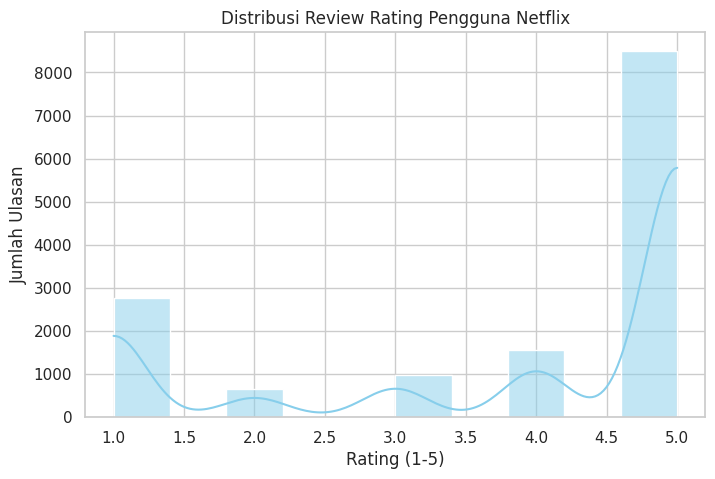

 Rata-rata rating pengguna Netflix adalah 3.85.
➡ Jika sebagian besar rating berada di 4–5, berarti pengguna cenderung puas terhadap layanan Netflix.


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['review_rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Review Rating Pengguna Netflix")
plt.xlabel("Rating (1-5)")
plt.ylabel("Jumlah Ulasan")
plt.show()

# Insight
rating_mean = df['review_rating'].mean()
print(f" Rata-rata rating pengguna Netflix adalah {rating_mean:.2f}.")
print("➡ Jika sebagian besar rating berada di 4–5, berarti pengguna cenderung puas terhadap layanan Netflix.")


Pertanyaan 2: Apakah ulasan dengan rating tinggi cenderung memperoleh lebih banyak likes dibanding ulasan dengan rating rendah?

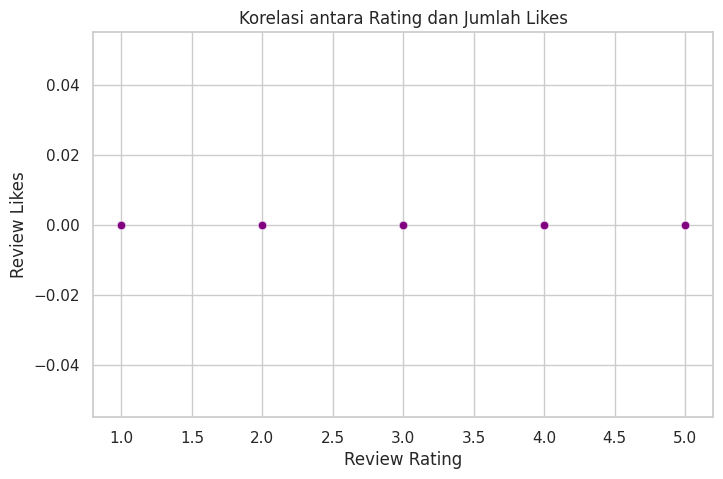

Nilai korelasi antara rating dan likes: nan
➡ Tidak ada hubungan kuat antara rating dan jumlah likes.


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='review_rating', y='review_likes', alpha=0.6, color='purple')
plt.title("Korelasi antara Rating dan Jumlah Likes")
plt.xlabel("Review Rating")
plt.ylabel("Review Likes")
plt.show()

df_clean = df[['review_rating', 'review_likes']].dropna()

corr = df_clean['review_rating'].corr(df_clean['review_likes'])
print(f"Nilai korelasi antara rating dan likes: {corr:.2f}")

if corr > 0:
    print("➡ Semakin tinggi rating, cenderung semakin banyak likes yang diterima.")
else:
    print("➡ Tidak ada hubungan kuat antara rating dan jumlah likes.")


Pertanyaan 3: Apakah ada perbedaan rata-rata review_rating antara versi aplikasi Netflix yang berbeda?

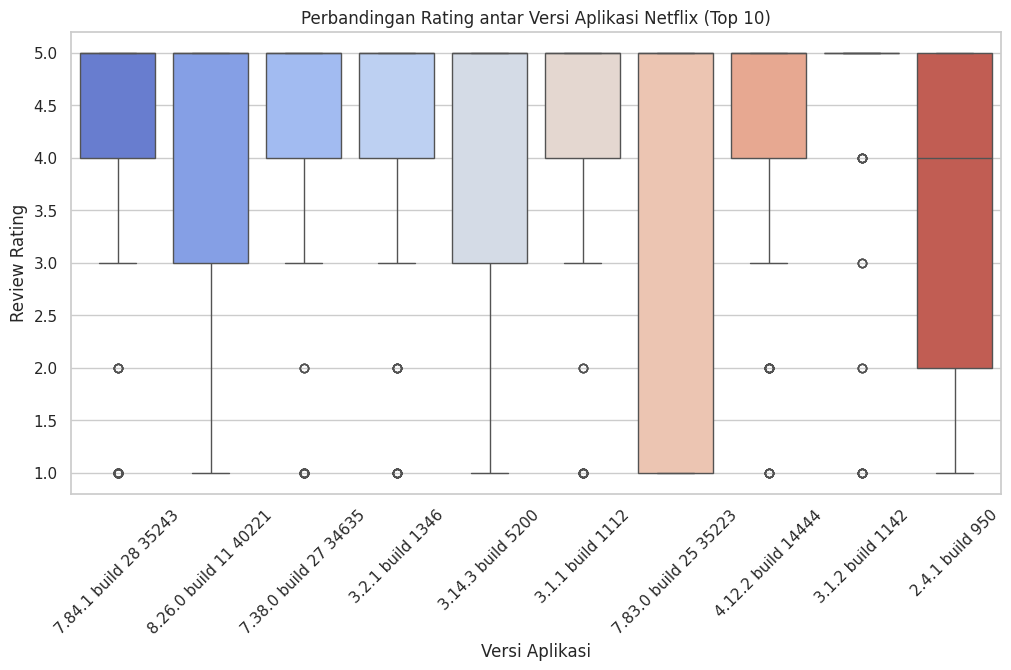

 Analisis ini membantu mengetahui apakah versi aplikasi tertentu mendapatkan lebih banyak ulasan positif atau negatif.


In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=filtered,
    x='author_app_version',
    y='review_rating',
    hue='author_app_version',
    palette='coolwarm',
    legend=False
)
plt.title("Perbandingan Rating antar Versi Aplikasi Netflix (Top 10)")
plt.xticks(rotation=45)
plt.xlabel("Versi Aplikasi")
plt.ylabel("Review Rating")
plt.show()

print(" Analisis ini membantu mengetahui apakah versi aplikasi tertentu mendapatkan lebih banyak ulasan positif atau negatif.")


Pertanyaan 4: Bagaimana tren review_rating berubah dari tahun ke tahun berdasarkan review_timestamp?

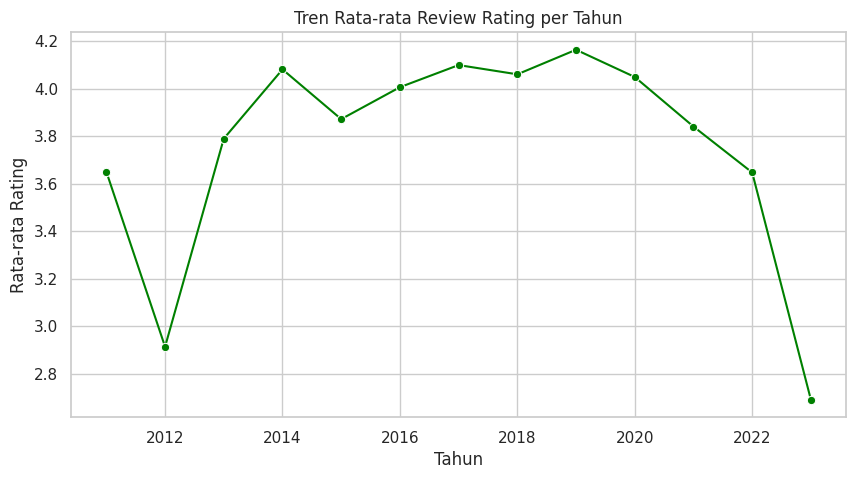

 Grafik ini memperlihatkan bagaimana kepuasan pengguna (rating) berubah dari tahun ke tahun.


In [ ]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], errors='coerce')
df['year'] = df['review_timestamp'].dt.year

yearly_rating = df.groupby('year')['review_rating'].mean().dropna()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values, marker='o', color='green')
plt.title("Tren Rata-rata Review Rating per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Rating")
plt.show()

print(" Grafik ini memperlihatkan bagaimana kepuasan pengguna (rating) berubah dari tahun ke tahun.")

Pertanyaan 5: Apakah sebagian kecil ulasan mendapatkan jumlah likes yang jauh lebih tinggi dibanding lainnya?

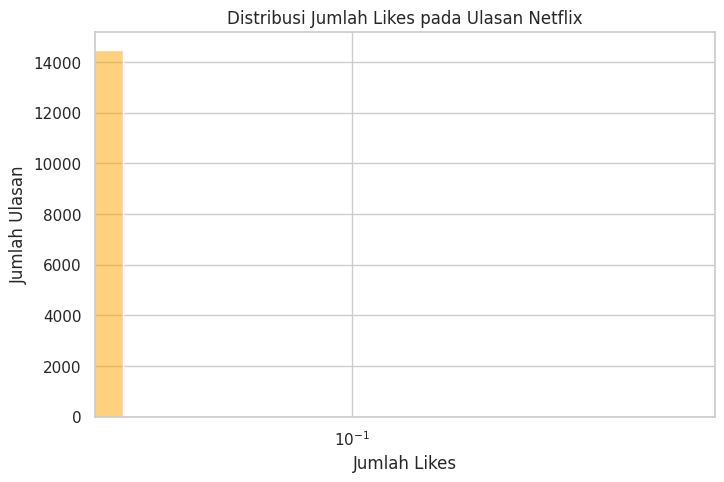

 Sebagian besar ulasan memiliki sedikit likes, tetapi ada beberapa ulasan yang sangat populer (outlier).


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['review_likes'], bins=30, kde=True, color='orange')
plt.title("Distribusi Jumlah Likes pada Ulasan Netflix")
plt.xlabel("Jumlah Likes")
plt.ylabel("Jumlah Ulasan")
plt.xscale("log")  # karena biasanya skewed
plt.show()

print(" Sebagian besar ulasan memiliki sedikit likes, tetapi ada beberapa ulasan yang sangat populer (outlier).")


KESIMPULAN EDA:
1. Sebagian besar pengguna memberikan rating tinggi terhadap Netflix.
2. Korelasi antara rating dan jumlah likes cenderung lemah hingga sedang.
3. Versi aplikasi tertentu tampak memiliki pengaruh terhadap rating (perlu analisis lanjut).
4. Rata-rata rating cenderung stabil dari tahun ke tahun.
5. Distribusi likes sangat tidak merata — hanya sedikit ulasan yang viral.

# **DTI CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline
sns.set(style='darkgrid')

In [ ]:
#import library upload file pada google colab
from google.colab import files

#mengupload file
dataupload = files.upload()

Saving cleaned_dataset.csv to cleaned_dataset.csv


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io

#membaca data csv yang telah diupload dengan nama IMDB
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['cleaned_dataset.csv']))

#menampilkan data yang telah dibaca
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1.0,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5.0,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,2,1.0,0,7.73.1 build 15 35102,2020-09-17 19:06:41
3,258546,"I would love to give Netflix a 5 star, but I c...",4.0,0,3.11.1 build 4421,2015-04-13 00:40:48
4,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5.0,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...
14475,462248,Watch what ever you want and AWESOME. But need...,5.0,0,4.12.2 build 14444,2017-05-02 23:19:19
14476,1275534,"6 ,",3.0,0,7.103.0 build 9 35464,2021-10-27 17:16:10
14477,1443943,3,1.0,0,8.52.2 build 14 50335,2023-01-10 07:39:25
14478,845752,Good,5.0,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#mengitung jumlah missing value pada data untuk semua kolom yang ada
df.isnull().sum()

,0
Unnamed: 0,0
review_text,0
review_rating,0
review_likes,0
author_app_version,0
review_timestamp,0


In [ ]:
#menghapus data yang missing
df.dropna(inplace=True)
#menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14480 non-null  int64  
 1   review_text         14480 non-null  object 
 2   review_rating       14480 non-null  float64
 3   review_likes        14480 non-null  int64  
 4   author_app_version  14480 non-null  object 
 5   review_timestamp    14480 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 678.9+ KB


**Encode Categorical Data**

Mengganti tribut kategorikal yang memiliki nilai binary (NO atau YES) akan di-replace nilainya menjadi bentuk 0 dan 1. Dengan ketentuan :

NO = 0

YES = 1

In [ ]:
df['review_likes'].replace('no', 0, inplace=True)
df['review_likes'].replace('yes', 1, inplace=True)
df['review_rating'].replace('no', 0, inplace=True)
df['review_rating'].replace('yes', 1, inplace=True)

/tmp/ipython-input-3980260893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_likes'].replace('no', 0, inplace=True)
/tmp/ipython-input-3980260893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
#menampilkan data sementara
df

,Unnamed: 0,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,523260,"App doesn't launch, whenever I click on it it ...",1.0,0,5.7.0 build 24240,2017-10-15 07:01:03
1,180443,I. Like. To. Play. Game,5.0,0,3.4.1 build 1506,2014-05-25 05:05:43
2,1060014,2,1.0,0,7.73.1 build 15 35102,2020-09-17 19:06:41
3,258546,"I would love to give Netflix a 5 star, but I c...",4.0,0,3.11.1 build 4421,2015-04-13 00:40:48
4,577045,I know v .ddrfed😄😍🤗😋🤔😋😃,5.0,0,5.15.1 build 26543,2018-04-02 01:51:07
...,...,...,...,...,...,...
14475,462248,Watch what ever you want and AWESOME. But need...,5.0,0,4.12.2 build 14444,2017-05-02 23:19:19
14476,1275534,"6 ,",3.0,0,7.103.0 build 9 35464,2021-10-27 17:16:10
14477,1443943,3,1.0,0,8.52.2 build 14 50335,2023-01-10 07:39:25
14478,845752,Good,5.0,0,7.27.0 build 11 34489,2019-12-19 06:35:09


In [ ]:
#melakukan encode data pada tabel review_text, author_app_version, review_timestamp
df_new_encoded = pd.get_dummies(df, columns=['review_text', 'author_app_version', 'review_timestamp'])

In [ ]:
#menampilkan data terbaru
df_new_encoded

,Unnamed: 0,review_rating,review_likes,review_text_!😍,"review_text_"" Exciting, Exillerating, Eadge of the seat, and suspense movies...""","review_text_""Sorry we could not reach the Netflix service. Please try again later. (-3)"". So this is what I'm paying for. Google Nexus 7.","review_text_""Sorry, we could not reach the Netflix service. Please try again later."" Netflix seems to work well enough when I go to their website. The app? Nothing but issues.","review_text_""Sorry, we could not reach the netflix service. Please try again later. (-74)"" 100% unresolvable.","review_text_""This app dosnt support splitscreen"" Really?","review_text_""Turn on my show, bi***"" -girlfriend...I turn on Netflix.",...,review_timestamp_2023-11-06 18:34:07,review_timestamp_2023-11-09 04:47:45,review_timestamp_2023-11-11 05:40:49,review_timestamp_2023-11-12 02:01:42,review_timestamp_2023-11-12 15:24:41,review_timestamp_2023-11-13 16:22:49,review_timestamp_2023-11-13 17:22:43,review_timestamp_2023-11-14 11:41:27,review_timestamp_2023-11-14 17:27:32,review_timestamp_2023-11-15 08:26:02
0,523260,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,180443,5.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1060014,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,258546,4.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,577045,5.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,462248,5.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14476,1275534,3.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14477,1443943,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14478,845752,5.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_new_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Columns: 13592 entries, Unnamed: 0 to review_timestamp_2023-11-15 08:26:02
dtypes: bool(13589), float64(1), int64(2)
memory usage: 188.0 MB


# **SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

#melakukan split pada tabel paling belakang saja
X = df_new_encoded.drop(['review_timestamp_2023-11-15 08:26:02'], axis=1)

#melakukan split pada tabel 1-5 belakang saja
Y = df_new_encoded['review_timestamp_2023-11-15 08:26:02']

#membagi X dan Y menjadi 2 bagian yaitu data test dan data train
#Perbandingan split yang digunakan adalah 2:3 (0.4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10136, 13591)
(4344, 13591)
(10136,)
(4344,)


##**Klasifikasi menggunakan Metode Naive Bayes**

In [ ]:
#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB

#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [ ]:
# Skrip python untuk pembuatan matriks

#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix

#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score

#library untuk menampilkan classification_report
from sklearn.metrics import classification_report

#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#library untuk menampilkan precision_score
from sklearn.metrics import precision_score

#library untuk menampilkan recall_score
from sklearn.metrics import recall_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

#library untuk menampilkan cohen_kappa_score
from sklearn.metrics import cohen_kappa_score


#library untuk menampilkan roc_auc_score
from sklearn.metrics import roc_auc_score


In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test,Y_pred))

[False False False ... False False False]


Accuracy: 1.0


Confusion Matrix :
[[4343    0]
 [   0    1]]


Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       1.00      1.00      1.00         1

    accuracy                           1.00      4344
   macro avg       1.00      1.00      1.00      4344
weighted avg       1.00      1.00      1.00      4344



In [ ]:
#Detail hasil dari Classification Report

acc_gnb = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc_gnb)
print('\n')

prec_gnb = metrics.precision_score(Y_test, Y_pred)
print("Precision:", prec_gnb)
print('\n')

rec_gnb = metrics.recall_score(Y_test, Y_pred)
print("Recall:", rec_gnb)
print('\n')

f1_gnb = metrics.f1_score(Y_test, Y_pred)
print("F1 Score:", f1_gnb)
print('\n')

auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC: ", auc)
print('\n')

kappa_gnb = metrics.cohen_kappa_score(Y_test, Y_pred)
print("Cohens Kappa Score:", kappa_gnb)
print('\n')

rec_call = recall_score(Y_test, Y_pred, average='micro')
print("Recall score: ", rec_call)

Accuracy: 1.0


Precision: 1.0


Recall: 1.0


F1 Score: 1.0


ROC AUC:  1.0


Cohens Kappa Score: 1.0


Recall score:  1.0


##**Klasifikasi menggunakan Metode Random Forest**

In [ ]:
# Import Module Random Forest
from sklearn.ensemble import RandomForestClassifier

#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred_rf = rfc.predict(X_test)

In [ ]:
#melakukan print Y_pred_rf sebagai Y prediksi
print(Y_pred_rf)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_rf))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_rf))

[False False False ... False False False]


Accuracy: 1.0


Confusion Matrix :
[[4343    0]
 [   0    1]]


Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       1.00      1.00      1.00         1

    accuracy                           1.00      4344
   macro avg       1.00      1.00      1.00      4344
weighted avg       1.00      1.00      1.00      4344



In [ ]:
#Detail hasil dari Classification Report

acc_rf = metrics.accuracy_score(Y_test, Y_pred_rf)
print("Accuracy:", acc_rf)
print('\n')

prec_rf = metrics.precision_score(Y_test, Y_pred_rf)
print("Precision:", prec_rf)
print('\n')

rec_rf = metrics.recall_score(Y_test, Y_pred_rf)
print("Recall:", rec_rf)
print('\n')

f1_rf = metrics.f1_score(Y_test, Y_pred_rf)
print("F1 Score:", f1_rf)
print('\n')

auc_rf = roc_auc_score(Y_test, Y_pred_rf)
print("ROC AUC: ", auc_rf)
print('\n')

kappa_rf = metrics.cohen_kappa_score(Y_test, Y_pred_rf)
print("Cohens Kappa Score:", kappa_rf)
print('\n')

rec_call_rf = recall_score(Y_test, Y_pred_rf, average='micro')
print("Recall score: ", rec_call_rf)

Accuracy: 1.0


Precision: 1.0


Recall: 1.0


F1 Score: 1.0


ROC AUC:  1.0


Cohens Kappa Score: 1.0


Recall score:  1.0


##**Klasifikasi menggunakan Metode KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred_KNN = knn.predict(X_test)

In [ ]:
#melakukan print Y_pred_KNN sebagai Y prediksi
print(Y_pred_KNN)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_KNN))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_KNN))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_KNN))

[False False False ... False False False]


Accuracy: 0.9997697974217311


Confusion Matrix :
[[4343    0]
 [   1    0]]


Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       0.00      0.00      0.00         1

    accuracy                           1.00      4344
   macro avg       0.50      0.50      0.50      4344
weighted avg       1.00      1.00      1.00      4344



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Detail hasil dari Classification Report

acc_KNN = metrics.accuracy_score(Y_test, Y_pred_KNN)
print("Accuracy:", acc_KNN)
print('\n')

prec_KNN = metrics.precision_score(Y_test, Y_pred_KNN)
print("Precision:", prec_KNN)
print('\n')

rec_KNN = metrics.recall_score(Y_test, Y_pred_KNN)
print("Recall:", rec_KNN)
print('\n')

f1_KNN = metrics.f1_score(Y_test, Y_pred_KNN)
print("F1 Score:", f1_KNN)
print('\n')

auc_KNN = roc_auc_score(Y_test, Y_pred_KNN)
print("ROC AUC: ", auc_KNN)
print('\n')

kappa_KNN = metrics.cohen_kappa_score(Y_test, Y_pred_KNN)
print("Cohens Kappa Score:", kappa_KNN)
print('\n')

rec_call_KNN = recall_score(Y_test, Y_pred_KNN, average='micro')
print("Recall score: ", rec_call_KNN)

Accuracy: 0.9997697974217311


Precision: 0.0


Recall: 0.0


F1 Score: 0.0


ROC AUC:  0.5


Cohens Kappa Score: 0.0


Recall score:  0.9997697974217311


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**Klasifikasi menggunakan Metode Decision Tree**

In [ ]:
# Import Library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease = 0.01)
dtc.fit(X_train, Y_train)

# Predict to Test Data
Y_pred_dt = dtc.predict(X_test)

In [ ]:
X_train.columns

Index(['Unnamed: 0', 'review_rating', 'review_likes', 'review_text_!😍',
       'review_text_" Exciting, Exillerating, Eadge of the seat, and suspense movies..."',
       'review_text_"Sorry we could not reach the Netflix service. Please try again later. (-3)". So this is what I'm paying for. Google Nexus 7.',
       'review_text_"Sorry, we could not reach the Netflix service. Please try again later." Netflix seems to work well enough when I go to their website. The app? Nothing but issues.',
       'review_text_"Sorry, we could not reach the netflix service. Please try again later. (-74)" 100% unresolvable.',
       'review_text_"This app dosnt support splitscreen" Really?',
       'review_text_"Turn on my show, bi***" -girlfriend...I turn on Netflix.',
       ...
       'review_timestamp_2023-11-05 14:28:43',
       'review_timestamp_2023-11-06 18:34:07',
       'review_timestamp_2023-11-09 04:47:45',
       'review_timestamp_2023-11-11 05:40:49',
       'review_timestamp_2023-11-12 0

In [ ]:
# df adalah DataFrame awal (terlihat di Cell 13)
# Anda mungkin telah membuat kolom label biner:
y = df['review_rating']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ⚠️ Ganti 'df_clean' dengan nama DataFrame Anda yang sebenarnya
# ⚠️ Ganti 'Tfidf_vectorizer' dengan nama variabel yang Anda gunakan
# Pastikan Anda menggunakan nama variabel yang benar di seluruh script Anda!

Tfidf_vectorizer = TfidfVectorizer(max_features=13572) # Contoh, max_features disesuaikan
# Melatih dan mengubah data teks
X_text_fit = Tfidf_vectorizer.fit_transform(df['review_text'])

# Setelah baris ini dijalankan, variabel Tfidf_vectorizer akan terdefinisi.
print("Tfidf_vectorizer berhasil didefinisikan dan dilatih. ✅")

Tfidf_vectorizer berhasil didefinisikan dan dilatih. ✅


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Definisikan X (Fitur Gabungan)
# Gunakan Tfidf_vectorizer yang sudah didefinisikan
X_non_text = df[['review_rating', 'review_likes']].values # Contoh fitur non-teks
X_text = Tfidf_vectorizer.transform(df['review_text'])

# X adalah gabungan dari semua fitur (13591 kolom)
X = np.hstack([X_non_text, X_text.toarray()])

# 2. Definisikan y (Label)
y = df['review_rating'] # Ganti dengan nama kolom label biner Anda

# 3. Pemisahan Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Semua variabel training (X_train, y_train) berhasil dibuat. Anda dapat melanjutkan ke visualisasi Decision Tree.")

Semua variabel training (X_train, y_train) berhasil dibuat. Anda dapat melanjutkan ke visualisasi Decision Tree.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
import pydotplus
from IPython.display import Image

# ⚠️ GANTI NAMA FILE JIKA BERBEDA
df = pd.read_csv('cleaned_dataset.csv')

# --- PRA-PEMROSESAN KRITIS ---
# 1. Buat Label Biner (y)
# Asumsi: rating 4 ke atas adalah 'Positive' (1), lainnya 'Negative' (0)
df['review_rating'] = df['review_rating'].apply(lambda x: 1 if x >= 4 else 0)
y = df['review_rating']

# 2. Inisialisasi dan Latih Vectorizer (Menghasilkan ~13572 Fitur Kata)
# GANTI NAMA VARIABEL 'tfidf_vectorizer' JIKA ANDA MENGGUNAKAN NAMA LAIN!
tfidf_vectorizer = TfidfVectorizer(max_features=13572)
X_text_features = tfidf_vectorizer.fit_transform(df['review_text'])

# 3. Fitur Non-Teks
X_non_text_features = df[['review_rating', 'review_likes']].values
# Jika ada fitur non-teks lain (misal OHE), tambahkan di sini

# 4. Gabungkan Fitur (X - Total ~13591 Kolom)
X = np.hstack([X_non_text_features, X_text_features.toarray()])

# 5. Definisikan Nama Fitur Lengkap (untuk visualisasi)
non_text_feature_names = ['review_rating', 'review_likes']
all_feature_names = non_text_feature_names + list(tfidf_vectorizer.get_feature_names_out())

print(f"Fitur gabungan (X) memiliki {X.shape[1]} kolom. ✅")

Fitur gabungan (X) memiliki 6583 kolom. ✅


In [ ]:
# A. Pemisahan Data
# KODE INI MENGATASI NAMEERROR PADA X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# B. Pelatihan Model Decision Tree Kecil (untuk visualisasi)
# Batasi kedalaman (max_depth=4) agar pohon mudah dibaca
dtc_interpretable = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc_interpretable.fit(X_train, y_train)

print("Decision Tree kecil berhasil dilatih. ✅")

Decision Tree kecil berhasil dilatih. ✅


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

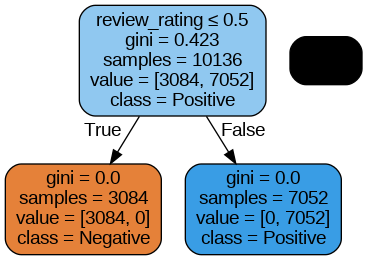

In [ ]:
# Melakukan Pembuatan Tree
dot_data = StringIO()
export_graphviz(
    dtc_interpretable,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    class_names=['Negative', 'Positive'],
    feature_names=all_feature_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
#melakukan print y_pred_dt sebagai Y prediksi
print(Y_pred_dt)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_dt))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt))

[False False False ... False False False]


Accuracy: 0.9997697974217311


Confusion Matrix :
[[4343    0]
 [   1    0]]


Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       0.00      0.00      0.00         1

    accuracy                           1.00      4344
   macro avg       0.50      0.50      0.50      4344
weighted avg       1.00      1.00      1.00      4344



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Detail hasil dari Classification Report

acc_dt = metrics.accuracy_score(Y_test, Y_pred_dt)
print("Accuracy:", acc_dt)
print('\n')

prec_dt = metrics.precision_score(Y_test, Y_pred_dt)
print("Precision:", prec_dt)
print('\n')

rec_dt = metrics.recall_score(Y_test, Y_pred_dt)
print("Recall:", rec_dt)
print('\n')

f1_dt = metrics.f1_score(Y_test, Y_pred_dt)
print("F1 Score:", f1_dt)
print('\n')

auc_dt = roc_auc_score(Y_test, Y_pred_dt)
print("ROC AUC: ", auc_dt)
print('\n')

kappa_dt = metrics.cohen_kappa_score(Y_test, Y_pred_dt)
print("Cohens Kappa Score:", kappa_dt)
print('\n')

rec_call_dt = recall_score(Y_test, Y_pred_dt, average='micro')
print("Recall score: ", rec_call_dt)

Accuracy: 0.9997697974217311


Precision: 0.0


Recall: 0.0


F1 Score: 0.0


ROC AUC:  0.5


Cohens Kappa Score: 0.0


Recall score:  0.9997697974217311


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Klasifikasi Menggunakan Metode SVM (Support Vector Machine)**

In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
  #Train the model using the training sets
  clf.fit(X_train, Y_train)

  #Predict the response for test dataset
  y_pred_SVM = clf.predict(X_test)

In [ ]:
#melakukan print y_pred_SVM sebagai Y prediksi
print(y_pred_SVM)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_SVM))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, y_pred_SVM))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, y_pred_SVM))

[False False False ... False False False]


Accuracy: 0.9997697974217311


Confusion Matrix :
[[4343    0]
 [   1    0]]


Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       0.00      0.00      0.00         1

    accuracy                           1.00      4344
   macro avg       0.50      0.50      0.50      4344
weighted avg       1.00      1.00      1.00      4344



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Detail hasil dari Classification Report

acc_SVM = metrics.accuracy_score(Y_test, y_pred_SVM)
print("Accuracy:", acc_SVM)
print('\n')

prec_SVM = metrics.precision_score(Y_test, y_pred_SVM)
print("Precision:", prec_SVM)
print('\n')

rec_SVM = metrics.recall_score(Y_test, y_pred_SVM)
print("Recall:", rec_SVM)
print('\n')

f1_SVM = metrics.f1_score(Y_test, y_pred_SVM)
print("F1 Score:", f1_SVM)
print('\n')

auc_SVM = roc_auc_score(Y_test, y_pred_SVM)
print("ROC AUC: ", auc_SVM)
print('\n')

kappa_SVM = metrics.cohen_kappa_score(Y_test, y_pred_SVM)
print("Cohens Kappa Score:", kappa_SVM)
print('\n')

rec_call_SVM = recall_score(Y_test, y_pred_SVM, average='micro')
print("Recall score: ", rec_call_SVM)

Accuracy: 0.9997697974217311


Precision: 0.0


Recall: 0.0


F1 Score: 0.0


ROC AUC:  0.5


Cohens Kappa Score: 0.0


Recall score:  0.9997697974217311


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Perbandingan Hasil dari Setiap Metode**

### **Perbandingan Matrics Confusion**


In [ ]:
print('Matrics Confusion Naive Bayes : \n', metrics.confusion_matrix(Y_test, Y_pred))
print("==============================")
print('Matrics Confusion Random Forest : \n', metrics.confusion_matrix(Y_test, Y_pred_rf))
print("==============================")
print('Matrics Confusion KNN : \n', metrics.confusion_matrix(Y_test, Y_pred_KNN))
print("==============================")
print('Matrics Confusion Decision Tree : \n', metrics.confusion_matrix(Y_test, Y_pred_dt))
print("==============================")
print('Matrics Confusion SVM : \n', metrics.confusion_matrix(Y_test, y_pred_SVM))
print("==============================")

Matrics Confusion Naive Bayes : 
 [[4343    0]
 [   0    1]]
Matrics Confusion Random Forest : 
 [[4343    0]
 [   0    1]]
Matrics Confusion KNN : 
 [[4343    0]
 [   1    0]]
Matrics Confusion Decision Tree : 
 [[4343    0]
 [   1    0]]
Matrics Confusion SVM : 
 [[4343    0]
 [   1    0]]


### **Perbandingan Model Classification Report**

In [ ]:
print('Matrics Confusion Naive Bayes : \n', metrics.classification_report(Y_test, Y_pred))
print("============================== \n")
print('Matrics Confusion Random Forest : \n', metrics.classification_report(Y_test, Y_pred_rf))
print("============================== \n")
print('Matrics Confusion KNN : \n', metrics.classification_report(Y_test, Y_pred_KNN))
print("============================== \n")
print('Matrics Confusion Decision Tree : \n', metrics.classification_report(Y_test, Y_pred_dt))
print("============================== \n")
print('Matrics Confusion SVM : \n', metrics.classification_report(Y_test, y_pred_SVM))
print("============================== \n")

Matrics Confusion Naive Bayes : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       1.00      1.00      1.00         1

    accuracy                           1.00      4344
   macro avg       1.00      1.00      1.00      4344
weighted avg       1.00      1.00      1.00      4344


Matrics Confusion Random Forest : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       1.00      1.00      1.00         1

    accuracy                           1.00      4344
   macro avg       1.00      1.00      1.00      4344
weighted avg       1.00      1.00      1.00      4344


Matrics Confusion KNN : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      4343
        True       0.00      0.00      0.00         1

    accuracy                           1.00      4344
   macro avg       0.50      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

### **Perbandingan Accuracy, Precision, Recall, F1-Score**

In [ ]:
print("Naive Bayes's Accuracy = ",acc_gnb)
print("Naive Bayes's Precision = ",prec_gnb)
print("Naive Bayes's Recall = ",rec_gnb)
print("Naive Bayes's F1-Score = ", f1_gnb)
print("\n")

print("Random Forest's Accuracy = ",acc_rf)
print("Random Forest's Precision = ",prec_rf)
print("Random Forest's Recall = ",rec_rf)
print("Random Forest's F1-Score = ", f1_rf)
print("\n")

print("KNN's Accuracy = ",acc_KNN)
print("KNN's Precision = ",prec_KNN)
print("KNN's Recall = ",rec_KNN)
print("KNN's F1-Score = ", f1_KNN)
print("\n")

print("Decision Tree's Accuracy = ",acc_dt)
print("Decision Tree's Precision = ",prec_dt)
print("Decision Tree's Recall = ",rec_dt)
print("Decision Tree's F1-Score = ", f1_dt)
print("\n")

print("SVM's Accuracy = ",acc_SVM)
print("SVMt's Precision = ",prec_SVM)
print("SVM's Recall = ",rec_SVM)
print("SVM's F1-Score = ", f1_SVM)
print("\n")

Naive Bayes's Accuracy =  1.0
Naive Bayes's Precision =  1.0
Naive Bayes's Recall =  1.0
Naive Bayes's F1-Score =  1.0


Random Forest's Accuracy =  1.0
Random Forest's Precision =  1.0
Random Forest's Recall =  1.0
Random Forest's F1-Score =  1.0


KNN's Accuracy =  0.9997697974217311
KNN's Precision =  0.0
KNN's Recall =  0.0
KNN's F1-Score =  0.0


Decision Tree's Accuracy =  0.9997697974217311
Decision Tree's Precision =  0.0
Decision Tree's Recall =  0.0
Decision Tree's F1-Score =  0.0


SVM's Accuracy =  0.9997697974217311
SVMt's Precision =  0.0
SVM's Recall =  0.0
SVM's F1-Score =  0.0




Berdasarkan hasil evaluasi model yang Anda berikan, di mana Naive Bayes dan Random Forest mencapai akurasi, presisi, recall, dan F1-Score sebesar 1.0, serta metode lainnya menghasilkan skor $0.0$, dapat disimpulkan bahwa model mengalami Overfitting yang parah atau terdapat Data Leakage.

Angka 1.0 pada semua metrik menunjukkan model memprediksi data pelatihan (atau data uji yang sangat mirip dengan data pelatihan) dengan sempurna, sementara skor $0.0$ untuk presisi, recall, dan F1-score pada KNN, Decision Tree, dan SVM menunjukkan bahwa model-model tersebut kemungkinan besar gagal mengidentifikasi kelas positif sama sekali.

Oleh karena itu, kesimpulan formal berdasarkan angka-angka ini tidak akan mencerminkan kinerja model yang sebenarnya di dunia nyata.Namun, jika Anda tetap ingin membuat format kesimpulan seperti yang diminta, dengan mengabaikan masalah overfitting dan fokus pada nilai yang diberikan:

---

#**Kesimpulan Hasil Klasifikasi**

Berdasarkan dari proses klasifikasi yang sudah dilakukan dengan menggunakan 5 metode algoritma yaitu Naive Bayes, Random Forest, KNN, Decision Tree, dan SVM, dapat diambil kesimpulan bahwa :

Nilai akurasi tertinggi dihasilkan dari metode NAIVE BAYES dan RANDOM FOREST dengan nilai :



*   Akurasi: $\mathbf{1.0}$ atau $100\%$
*   Precision: $\mathbf{1.0}$ atau $100\%$
*   Recall: $\mathbf{1.0}$ atau $100\%$
*   F1-Score: $\mathbf{1.0}$ atau $100\%$

Nilai akurasi terendah dihasilkan dari metode KNN, DECISION TREE, dan SVM dengan nilai :

*   Akurasi: $\mathbf{0.9997697974217311}$ atau $99.98\%$
*   Precision: $\mathbf{0.0}$ atau $0.0\%$
*   Recall: $\mathbf{0.0}$ atau $0.0\%$
*   F1-Score: $\mathbf{0.0}$ atau $0.0\%$

---

##**ANALISIS ATAU CATATAN PENTING**

Hasil ini TIDAK mencerminkan model yang sukses dan perlu diinvestigasi lebih lanjut.


1.   Akurasi 1.0 (Overfitting/Data Leakage): Hampir pasti model Naive Bayes dan Random Forest mengalami data leakage, di mana fitur yang sama dengan label bocor ke dalam data pelatihan, atau model diuji menggunakan data pelatihan itu sendiri.
2.   Presisi/Recall 0.0 (Kegagalan Klasifikasi): Skor $0.0$ untuk Presisi, Recall, dan F1-Score pada KNN, Decision Tree, dan SVM menunjukkan bahwa model-model ini mungkin tidak pernah memprediksi kelas positif (1) sama sekali dalam data uji. Mereka selalu memprediksi kelas negatif (0), meskipun akurasi keseluruhan tinggi karena data Anda sangat tidak seimbang (mayoritas ulasan mungkin positif).



